In [1]:
# misc
import warnings
warnings.filterwarnings('ignore')
import gc

# basic imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
sns.set(palette='colorblind')

# processing
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import VarianceThreshold
from scipy.stats import gmean, mode
from scipy.sparse import csr_matrix

import shap

# models
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from sklearn.linear_model import LinearRegression, Ridge

In [2]:
# This will be now a dataframe
def stats_prop(df, usefractions=False):
    means = []
    gmeans = []
    medians = []
    modes = []
    stds = []
    skews = []
    kurts = []
    mins = []
    maxs = []
    sums = []
    counts = []
    fractions = []
    q1s = []
    q3s = []
    p10s = []
    p20s = []
    p30s = []
    p40s = []
    p60s = []
    p70s = []
    p80s = []
    p90s = []
    log_means = []
    log_gmeans = []
    log_medians = []
    log_modes = []
    log_stds = []
    log_skews = []
    log_kurts = []
    log_mins = []
    log_maxs = []
    log_q1s = []
    log_q3s = []
    log_p10s = []
    log_p20s = []
    log_p30s = []
    log_p40s = []
    log_p60s = []
    log_p70s = []
    log_p80s = []
    log_p90s = []
       
    for i, row in df.iterrows():
        nonzero_values = row[row.nonzero()[0]]
        if usefractions:
            nonzero_values = nonzero_values[nonzero_values-nonzero_values//1 != 0.]
        means.append(nonzero_values.mean())
        gmeans.append(gmean(nonzero_values))
        medians.append(nonzero_values.median())
        modes.append(mode(nonzero_values)[0][0] if len(nonzero_values)>0 else np.nan)
        stds.append(nonzero_values.std())
        skews.append(nonzero_values.skew())
        kurts.append(nonzero_values.kurtosis())
        mins.append(nonzero_values.min())
        maxs.append(nonzero_values.max())
        sums.append(nonzero_values.sum())
        counts.append(nonzero_values.count())
        fractions.append(nonzero_values.count()/row.count())        
        q1s.append(np.percentile(nonzero_values, q=25) if len(nonzero_values)>0 else np.nan)
        q3s.append(np.percentile(nonzero_values, q=75) if len(nonzero_values)>0 else np.nan)
        p10s.append(np.percentile(nonzero_values, q=10) if len(nonzero_values)>0 else np.nan)
        p20s.append(np.percentile(nonzero_values, q=20) if len(nonzero_values)>0 else np.nan)
        p30s.append(np.percentile(nonzero_values, q=30) if len(nonzero_values)>0 else np.nan)
        p40s.append(np.percentile(nonzero_values, q=40) if len(nonzero_values)>0 else np.nan)
        p60s.append(np.percentile(nonzero_values, q=60) if len(nonzero_values)>0 else np.nan)
        p70s.append(np.percentile(nonzero_values, q=70) if len(nonzero_values)>0 else np.nan)
        p80s.append(np.percentile(nonzero_values, q=80) if len(nonzero_values)>0 else np.nan)
        p90s.append(np.percentile(nonzero_values, q=90) if len(nonzero_values)>0 else np.nan)
        log_means.append(np.log1p(nonzero_values).mean())
        log_gmeans.append(gmean(np.log1p(nonzero_values)))
        log_medians.append(np.log1p(nonzero_values).median())
        log_modes.append(mode(np.log1p(nonzero_values))[0][0] if len(nonzero_values)>0 else np.nan)
        log_stds.append(np.log1p(nonzero_values).std())
        log_skews.append(np.log1p(nonzero_values).skew())
        log_kurts.append(np.log1p(nonzero_values).kurtosis())
        log_mins.append(np.log1p(nonzero_values).min())
        log_maxs.append(np.log1p(nonzero_values).max())
        log_q1s.append(np.percentile(np.log1p(nonzero_values), q=25) if len(nonzero_values)>0 else np.nan)
        log_q3s.append(np.percentile(np.log1p(nonzero_values), q=75) if len(nonzero_values)>0 else np.nan)
        log_p10s.append(np.percentile(np.log1p(nonzero_values), q=10) if len(nonzero_values)>0 else np.nan)
        log_p20s.append(np.percentile(np.log1p(nonzero_values), q=20) if len(nonzero_values)>0 else np.nan)
        log_p30s.append(np.percentile(np.log1p(nonzero_values), q=30) if len(nonzero_values)>0 else np.nan)
        log_p40s.append(np.percentile(np.log1p(nonzero_values), q=40) if len(nonzero_values)>0 else np.nan)
        log_p60s.append(np.percentile(np.log1p(nonzero_values), q=60) if len(nonzero_values)>0 else np.nan)
        log_p70s.append(np.percentile(np.log1p(nonzero_values), q=70) if len(nonzero_values)>0 else np.nan)
        log_p80s.append(np.percentile(np.log1p(nonzero_values), q=80) if len(nonzero_values)>0 else np.nan)
        log_p90s.append(np.percentile(np.log1p(nonzero_values), q=90) if len(nonzero_values)>0 else np.nan)
    
    stat_df = pd.DataFrame({'means': np.array(means)})
    stat_df['gmeans'] = np.array(gmeans)
    stat_df['medians'] = np.array(medians)
    stat_df['modes'] = np.array(modes)
    #stat_df['stds'] = np.array(stds)
    #stat_df['skews'] = np.array(skews)
    #stat_df['kurts'] = np.array(kurts)
    stat_df['mins'] = np.array(mins)
    stat_df['maxs'] = np.array(maxs)
    stat_df['sums'] = np.array(sums)
    stat_df['counts'] = np.array(counts)
    stat_df['fractions'] = np.array(fractions)
    stat_df['q1s'] = np.array(q1s)
    stat_df['q3s'] = np.array(q3s)
    stat_df['p10s'] = np.array(p10s)
    stat_df['p20s'] = np.array(p20s)
    stat_df['p30s'] = np.array(p30s)
    stat_df['p40s'] = np.array(p40s)
    stat_df['p60s'] = np.array(p60s)
    stat_df['p70s'] = np.array(p70s)
    stat_df['p80s'] = np.array(p80s)
    stat_df['p90s'] = np.array(p90s)
    #stat_df = pd.DataFrame({'log_means': np.array(log_means)})
    stat_df['log_gmeans'] = np.array(log_gmeans)
    stat_df['log_medians'] = np.array(log_medians)
    stat_df['log_modes'] = np.array(log_modes)
    #stat_df['log_stds'] = np.array(log_stds)
    #stat_df['log_skews'] = np.array(log_skews)
    #stat_df['log_kurts'] = np.array(log_kurts)
    stat_df['log_mins'] = np.array(log_mins)
    stat_df['log_maxs'] = np.array(log_maxs)
    stat_df['log_q1s'] = np.array(log_q1s)
    stat_df['log_q3s'] = np.array(log_q3s)
    stat_df['log_p10s'] = np.array(log_p10s)
    stat_df['log_p20s'] = np.array(log_p20s)
    stat_df['log_p30s'] = np.array(log_p30s)
    stat_df['log_p40s'] = np.array(log_p40s)
    stat_df['log_p60s'] = np.array(log_p60s)
    stat_df['log_p70s'] = np.array(log_p70s)
    stat_df['log_p80s'] = np.array(log_p80s)
    stat_df['log_p90s'] = np.array(log_p90s)
    
    return stat_df    

In [3]:
train_data = pd.read_csv('../data/train.csv')
test_data = pd.read_csv('../data/test.csv')

In [4]:
target = train_data.target
train_ID = train_data.ID
train_data = train_data.drop(['target', 'ID'], axis=1)
test_ID = test_data.ID
test_data = test_data.drop(['ID'], axis=1)

In [5]:
vt = VarianceThreshold(threshold=0.)
vt.fit(train_data)
selected_columns = train_data.columns[vt.get_support(indices=True)]

In [6]:
train_data = train_data[selected_columns]
test_data = test_data[selected_columns]

train_data.shape

(4459, 4735)

In [7]:
train_data = train_data.T.drop_duplicates().T
test_data = test_data[train_data.columns]

train_data.shape

(4459, 4730)

In [8]:
train_data = train_data/1000.
test_data = test_data/1000.

In [9]:
log_target = np.log1p(target/1000.)
#log_target = np.log1p(target)

In [10]:
stat_train = stats_prop(train_data)
stat_test = stats_prop(test_data)

In [11]:
train_data = train_data.replace(0., np.nan)
test_data = test_data.replace(0., np.nan)

In [12]:
train_data.head()

,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,dc5a8f1d8,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2200.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
stat_train.head()

,means,gmeans,medians,modes,mins,maxs,sums,counts,fractions,q1s,...,log_q1s,log_q3s,log_p10s,log_p20s,log_p30s,log_p40s,log_p60s,log_p70s,log_p80s,log_p90s
0,7066.356209,2858.971431,2400.00000,400.0,250.0,40000.0,720768.33332,102,0.021564,912.5,...,6.817007,8.878479,6.016226,6.579178,7.030055,7.410382,8.309112,8.705490,9.341456,9.998843
1,7939.800995,4303.260088,2225.00000,2000.0,800.0,50000.0,531966.66668,67,0.014165,2000.0,...,7.601402,9.157766,7.601402,7.601402,7.601402,7.601402,8.294300,8.853808,9.544127,9.878957
2,4233.333333,2473.859829,4000.00000,4000.0,200.0,12000.0,76200.00000,18,0.003805,1125.0,...,7.010038,8.677932,5.942616,6.775018,7.364943,7.824446,8.357977,8.612685,8.699681,9.108949
3,1517.757575,401.771116,261.33333,100.0,2.0,6000.0,33390.66666,22,0.004651,100.0,...,4.615121,7.601402,4.615121,4.615121,4.615121,5.303305,6.338374,7.472248,7.601402,8.664920
4,6872.846154,2567.099104,4700.00000,200.0,60.0,37662.0,178694.00000,26,0.005497,1180.0,...,7.074117,8.972850,5.303305,5.993961,7.337760,7.601402,8.699681,8.869724,8.987322,9.301593


In [ ]:
#train_leak = pd.read_csv('../submission_files/leak/public/01. train_leak.csv', usecols=['compiled_leak']).replace(np.nan, 0.)
#test_leak = pd.read_csv('../submission_files/leak/public/01. test_leak.csv', usecols=['compiled_leak']).replace(np.nan, 0.)

In [ ]:
#leak_index_train = train_leak[train_leak.compiled_leak != 0.].index.values
#leak_index_test = test_leak[test_leak.compiled_leak != 0.].index.values

In [ ]:
#leak_values_train = train_leak.compiled_leak[leak_index_train].values
#leak_values_test = test_leak.compiled_leak[leak_index_test].values

In [15]:
cols_leak = ['f190486d6', '58e2e02e6', 'eeb9cd3aa', '9fd594eec', '6eef030c1', '15ace8c9f', 'fb0f5dbfe', '58e056e12', '20aa07010',
             '024c577b9', 'd6bb78916', 'b43a7cfd5', '58232a6fb', '1702b5bf0', '324921c7b', '62e59a501', '2ec5b290f', '241f0f867',
             'fb49e4212', '66ace2992', 'f74e8f13d', '5c6487af1', '963a49cdc', '26fc93eb7', '1931ccfdd', '703885424', '70feb1494',
             '491b9ee45', '23310aa6f', 'e176a204a', '6619d81fc', '1db387535', 'fc99f9426', '91f701ba2', '0572565c2', '190db8488',
             'adb64ff71', 'c47340d97', 'c5a231d81', '0ff32eb98']

In [ ]:
#other_cols = ['ced6a7e91', '9df4daa99', '83c3779bf', 'edc84139a', 'f1e0ada11', '73687e512', 'aa164b93b', '342e7eb03', 'cd24eae8a', '8f3740670', '2b2a10857', 'a00adf70e', 
#           '3a48a2cd2', 'a396ceeb9', '9280f3d04', 'fec5eaf1a', '5b943716b', '22ed6dba3', '5547d6e11', 'e222309b0', '5d3b81ef8', '1184df5c2', '2288333b4', 'f39074b55', 
#           'a8b721722', '13ee58af1', 'fb387ea33', '4da206d28', 'ea4046b8d', 'ef30f6be5', 'b85fa8b27', '2155f5e16']

In [ ]:
extraf = [['9ddd6d137',
  '5cfc625f1',
  '8984e4066',
  '0ccd6454a',
  '9397535c7',
  'de7063efa',
  '74f3ac6af',
  '6bee3733e',
  '20e2c484e',
  '5adfe7419',
  '03a4ccd7c',
  'ecbd077d0',
  '851697562',
  '60cb16e88',
  '73a8a4d75',
  '4c48708d8',
  'ea72c62a1',
  'bbd16b7a0',
  '3fa6c395f',
  'dba14a5d4',
  '5d60b9ba7',
  '7f9e0d947',
  'a636266f3',
  '6931ed626',
  '76e9423c3',
  '6723b1708',
  'd80abf8bc',
  '7194699cd',
  'e3846e931',
  'b66bf9d44',
  'c436c7e73',
  'b74ef4294',
  'a2a1975d6',
  '1c4157dfd',
  'e32ad270b',
  'c30399758',
  'd45fd5508',
  'e97fa47e4',
  '02827212f',
  '6f53aee73'],
 ['d48c44c49',
  'e926d89d3',
  '4c0845957',
  '892f6f03e',
  '61b88b77a',
  '207021f50',
  'bb12b7d99',
  'e17a13988',
  'bfe5872ea',
  '788e6045c',
  '8291f21d8',
  '36ba6bac3',
  '66e323ce9',
  'a05f1bb14',
  'b379107b3',
  '084031585',
  '571380d69',
  '640a36efb',
  '5a53ebb69',
  '33288f3b2',
  '32138f717',
  'dd4649092',
  '8f993c285',
  '7b58b1340',
  'a3fb71dbd',
  '773c101b5',
  '7f6e612c7',
  '122df5341',
  'f95a762b0',
  '052f67cfa',
  'c03c8799c',
  'a3ef40228',
  'e0ceabad4',
  '3c27b0b28',
  'd833db6e1',
  '9303c6806',
  '36d35623e',
  '208308a47',
  '2f587f6a4',
  '23099cfb2'],
 ['6469d38ef',
  '22ff4e1b8',
  'cf4a89033',
  '2d7f256c6',
  'e98dd91da',
  'bce33962d',
  'cdaf3e576',
  '78b2cf944',
  'b3dbb1222',
  'a2d707f4e',
  'a5565ec7d',
  '26b423c42',
  '2731a96a2',
  'c24634d56',
  'dc61677e5',
  '62c319fd1',
  'fbe583de5',
  'ab7534e84',
  '92eb376f1',
  '7def2d7d3',
  '657d07d19',
  'df08959aa',
  '48130b04b',
  'e0cad27c5',
  '0b139c060',
  '99df18cb2',
  '32c6f9aa6',
  '7ff7d351b',
  'e49fea26e',
  '403e7e48d',
  '2c5809e51',
  'fe1160758',
  'd83991b80',
  'ce999e374',
  '29e58696d',
  '212226b7b',
  '950b9cf2d',
  'adc70e02f',
  '7792cebe0',
  '22f0deffc'],
 ['20868afc1',
  'a46587cda',
  'acdef5318',
  'a72fcabd8',
  '21216a0a8',
  'dd16bb1ff',
  '3b8208d28',
  'a8c320153',
  '4a6f8b2c1',
  'ac2392a17',
  '08565b519',
  '6035df6d8',
  '4b2316bd5',
  'bc3f77679',
  '51ebff825',
  '43727fb35',
  'c0d363088',
  'fd1187d68',
  '207871d87',
  '7e0fd6d92',
  'f4e243e21',
  '037a54e89',
  'cfa24e4be',
  'd7f1f9e52',
  '6760927a0',
  '0d8f892fe',
  '09e395f05',
  'bcc18dd40',
  '0f5fb7fe7',
  'f10717d56',
  '717039eef',
  '41fb39de4',
  '965fa6747',
  '75e55b7a9',
  'ff08cfbbe',
  '9e88cfd02',
  'df3ac443c',
  '7acda93e6',
  '62e587225',
  'd313c892b'],
 ['a59d32627',
  '157d8e6e5',
  '53c8cde8a',
  'b440fc661',
  '35d8689dd',
  'fd0f030fe',
  'a08d843a2',
  '200bc2176',
  '979ef2ee3',
  '129ce57a8',
  '739b1f317',
  '47744f333',
  '71a56bdae',
  '3f1c3c179',
  'cdf5a5db0',
  '2d4684f51',
  '52a02c635',
  '4e4e9d21b',
  '0829b92a4',
  'e8468d000',
  'a2d21363f',
  'de94ac9c7',
  '923a0c4bc',
  '3bd7cec10',
  '1dc5f8e47',
  '6312f13bd',
  'ad4d381a5',
  'beb887591',
  '904907a8f',
  '480611708',
  '2991c6c02',
  '8f3807320',
  '424409985',
  'c6dc522f9',
  '875ad1c4a',
  'dbb9a63fa',
  '68891097e',
  '4fe67672e',
  '4d3fb93d9',
  'd834302b0'],
 ['8ceddccb8',
  '203c64df6',
  '2087ed398',
  '30609ee5b',
  '7650524a3',
  'c07f4daba',
  '776c262ad',
  'e0a18e5b6',
  'd8e8397ce',
  '1ffee02ec',
  '8389fa5f0',
  '431e67099',
  'eae6fc02f',
  'b15a468b2',
  '5f04745bf',
  '6d773e96f',
  '46ee7f2c8',
  '43ef60caa',
  'f41af7c85',
  'abc207b83',
  'd6bca77b4',
  '54428f346',
  'dc135562a',
  'dc6676b1f',
  '4a3baddf6',
  '8601a29bc',
  '072452760',
  'af0b98ec8',
  '79c8119ae',
  '2dd0e885c',
  'bf40c722d',
  '098721511',
  '608639adb',
  'dd19c0b80',
  '67db03f3a',
  '062f6f3f7',
  '58a1cb6eb',
  '0de698985',
  '7f80a96a9',
  '2f8931894'],
 ['5bc10886b',
  '292471107',
  'fe919be32',
  'b1a7086ac',
  '88f64cd8b',
  '00c467392',
  'e24e3b26d',
  '42ebbcafa',
  'ee7c4db36',
  'b5c9b4e39',
  'adc894423',
  '9ba5eb33d',
  'd0631e6c0',
  'c611e1778',
  '2947535d9',
  'ef2056ce5',
  '79af1068d',
  '098913433',
  'dcf8a669f',
  'ce0ee5a89',
  'f6a05ad95',
  '831a9e087',
  '572f63ba5',
  '8fc5f0637',
  'fb36b89d9',
  '0926408ae',
  '63688d3df',
  '9ddb5842c',
  '2ea3f3caf',
  '32ebdadbc',
  '92fd74409',
  'b8fde5765',
  '2c97120d8',
  '44146018f',
  '67b44278a',
  '8afae1db8',
  'fd5c6c5aa',
  'b04bab75e',
  '9ee0b383b',
  '77f5250e3'],
 ['50603ae3d',
  '48282f315',
  '090dfb7e2',
  '6ccaaf2d7',
  '1bf2dfd4a',
  '50b1dd40f',
  '1604c0735',
  'e94c03517',
  'f9378f7ef',
  '65266ad22',
  'ac61229b6',
  'f5723deba',
  '1ced7f0b4',
  'b9a4f06cd',
  '8132d18b8',
  'df28ac53d',
  'ae825156f',
  '936dc3bc4',
  '5b233cf72',
  '95a2e29fc',
  '882a3da34',
  '2cb4d123e',
  '0e1921717',
  'c83d6b24d',
  '90a2428a5',
  '67e6c62b9',
  '320931ca8',
  '900045349',
  'bf89fac56',
  'da3b0b5bb',
  'f06078487',
  '56896bb36',
  'a79522786',
  '71c2f04c9',
  '1af96abeb',
  '4b1a994cc',
  'dee843499',
  '645b47cde',
  'a8e15505d',
  'cc9c2fc87'],
 ['2c7e41e16',
  '5ad1de183',
  'd8cc972fe',
  '5b2471c13',
  '841704460',
  '47e969ba0',
  'd77583e88',
  '991bca4be',
  'fd6e11a24',
  'b5a25e7c9',
  '61a0acefa',
  '0e931cdd3',
  'd9fa0485a',
  '614f8e1eb',
  '1996a153f',
  '289e5ecc3',
  'b7d2baa45',
  'ff8561ce9',
  '601d54a3a',
  '0fb0d19af',
  '7ee833549',
  '05c276b21',
  '0b26c77a9',
  'e8387d928',
  '8fe3c178c',
  '678e2d1dd',
  'd966ac62c',
  'f6c436744',
  'e25a65f3d',
  'f1b626ac2',
  'adf03173b',
  '57276ea06',
  '119230239',
  'bdbb0cd24',
  '9282e1543',
  'e7eb9a66b',
  '6dad99586',
  '4a9abd788',
  'e7e41bbde',
  'ebe9f985f'],
 ['f190486d6',
  '58e2e02e6',
  'eeb9cd3aa',
  '9fd594eec',
  '6eef030c1',
  '15ace8c9f',
  'fb0f5dbfe',
  '58e056e12',
  '20aa07010',
  '024c577b9',
  'd6bb78916',
  'b43a7cfd5',
  '58232a6fb',
  '1702b5bf0',
  '324921c7b',
  '62e59a501',
  '2ec5b290f',
  '241f0f867',
  'fb49e4212',
  '66ace2992',
  'f74e8f13d',
  '5c6487af1',
  '963a49cdc',
  '26fc93eb7',
  '1931ccfdd',
  '703885424',
  '70feb1494',
  '491b9ee45',
  '23310aa6f',
  'e176a204a',
  '6619d81fc',
  '1db387535',
  'fc99f9426',
  '91f701ba2',
  '0572565c2',
  '190db8488',
  'adb64ff71',
  'c47340d97',
  'c5a231d81',
  '0ff32eb98'],
 ['9c92cbc0c',
  'f0bb6139d',
  '812e9b700',
  'e975d3be7',
  'c38ca8ae3',
  '810a254cf',
  'e838549ac',
  '5341a81d1',
  'edc919c58',
  '3c2f0f2c5',
  '2c76aca6a',
  'a22d58a16',
  '9d77330d2',
  'f4393161a',
  'f1a0b77a5',
  '9060e5b59',
  '649ba759c',
  '536e3198c',
  'ad57dea17',
  '23c3f4cd9',
  '2f5688490',
  '4efdce83e',
  'e82967f3f',
  '3fdef7fe4',
  'd5fa5ffba',
  'f3901acd1',
  'b794c5b62',
  '96e03563a',
  '354d9a875',
  '2fff1237e',
  '90a420609',
  'b95a93172',
  '338f04484',
  '295de7381',
  '4b336f62e',
  '8dc18e7e1',
  '3072d6ac4',
  'd8ac7b733',
  'b2f4d49d1',
  '885cde177'],
 ['b33e83cdc',
  'ab8a614fa',
  'bf6e38e39',
  'eb7981dd4',
  '30a47af70',
  'f7eee8212',
  '9847e14d8',
  '1998aa946',
  '850e01a62',
  'ecd4c66ec',
  '56a21fe66',
  '3f382323a',
  'b0b1c81ac',
  'b47be7e76',
  'd8ea347e9',
  'ccc9ba695',
  '2e55d0383',
  'f471e9e82',
  '56ec098a1',
  '172a58959',
  '809a511d0',
  'a5e0d3ddb',
  '945dad481',
  'd66bbb5ed',
  'c98c2d3c0',
  '94ecf4c83',
  'bec7c48dd',
  'ea18d720e',
  'bee71cf84',
  '2f92a1a45',
  '3be79d4a5',
  'a388d3605',
  '36cde3ce8',
  '937854db6',
  '76e092b8c',
  '1d744ff92',
  'a43c53c45',
  '6045a2949',
  '3af1785ee',
  'f926a4cb4'],
 ['25968f96e',
  'fb8395d97',
  'ee9e70298',
  'e662f1672',
  'eda856f5f',
  '49f11e712',
  '43dc0f90c',
  '11d9e8383',
  '0738fe5ff',
  '3268914c7',
  '08d17e384',
  '1a67a2101',
  '406a11b5a',
  'e2e6f1d23',
  '2862eec4f',
  '9c6bf2983',
  '0a4e510ee',
  '14d2c6d95',
  '0a03426de',
  '82ade3db6',
  '8909b68e1',
  'aaed60a3d',
  '879e1f51a',
  '5cbf1b3ea',
  '1ecddbaa0',
  'b96718230',
  'bd550871c',
  'c55eb4392',
  '0743b9c08',
  '5580c77b0',
  '25613ca0a',
  'de66047b0',
  '2322dbbbb',
  '760ef38f1',
  'da5c36eee',
  '2de811f82',
  'a760e7f65',
  '5d8a2a27d'],
 ['2747680a8',
  '530e9b9b8',
  '89347f75a',
  'e2e1aaa1e',
  'd5858c659',
  '0247e4a94',
  '6ebf9e1d9',
  '88458cb21',
  '338651bd1',
  'f1d56af33',
  'aee922a7b',
  '83dbedc24',
  'f9a683437',
  '38b2aa032',
  '5c7eb01b4',
  '17cae1f2a',
  'fed5f4046',
  '4a3c29696',
  'af06d341e',
  '8eac9b173',
  'b709fd525',
  '5a99d7f30',
  '61b568ab8',
  '58007f90b',
  '50640c29c',
  '2d5b0ff08',
  '21ba6e2be',
  'ce30bda90',
  'bb9be3403',
  '2e5424c98',
  'b062e1a6f',
  'ca85585ce',
  '503de0024',
  'fd8f1d27f',
  '13bfe432c',
  '2821ba86f',
  '533e43257',
  '6804b5b03'],
 ['8c2252655',
  'fbc6c2b78',
  '0eebebc7c',
  'd9ce16f1c',
  'a0fe4bb10',
  '48df886f9',
  'ff96b95eb',
  'cb7ecfc41',
  '1ea08665c',
  'fe56ddf0f',
  '92e056c5c',
  '8516b48f5',
  '9133963bd',
  '166ccc410',
  '504c7e3bb',
  'c8ebd62ea',
  '15960e710',
  '0494ca73d',
  '72e970835',
  'fa977f17b',
  'ebbd8432c',
  '0cb171797',
  '40e17d035',
  'dd2fc27b0',
  '6bb4be4f2',
  'bb9aefe00',
  '9ca9e4916',
  '2ad4525cc',
  '108fe14ef',
  'c75604498',
  '5dd6254bb',
  'ddfc3e604',
  '6bf90e4f5',
  '31e434a58',
  '2e768f672',
  '4d5a5e150',
  '02c1bd442'],
 ['468d2c3b6',
  '57e185aad',
  'f72edfb37',
  'b6f5910aa',
  '4a39584e5',
  '951ef1246',
  '76bfb8732',
  '4a0e1a740',
  'fb5e1b2b7',
  'a1f9d1680',
  'd3b9b9a70',
  '77697c671',
  '0afb0ddcc',
  '1189ee335',
  'bfbc53791',
  '848b67fcc',
  'fc02e674d',
  '4a8917f77',
  '1401de8c2',
  '2a6e64bb9',
  'cac875244',
  '3e1100230',
  '82f715995',
  '59cafde1f',
  '1d81e197a',
  '3f8854df3',
  '17b81a716',
  '26cc05472',
  '6786ea46d',
  '1110cf9ea',
  '621833d9b',
  '5a798adc1',
  'c270cb02b',
  '26ab20ff9',
  'fbaed5913',
  'ea01904df'],
 ['0b2e88d2d',
  '006e72749',
  'f29217d2f',
  'f6240919f',
  '232ecc840',
  'd4087a281',
  '398cdc105',
  '3b67e9641',
  '73eeb092f',
  '06283f348',
  'd7db08081',
  '2585a26fe',
  'da59aa67e',
  '638d0b2e0',
  'afc08501b',
  'd974e8584',
  '433d408b2',
  '0989e152f',
  '357784061',
  '2e22a32fd',
  '184166328',
  '81f4bc3d8',
  'd9fbf30dd',
  '5d52b2d2b',
  '0895b9597',
  '422acfada',
  'a1868e9ec',
  '98c05b5b4',
  '8ff5cf8c3',
  'bf257a3bc',
  'f86eabcb9',
  'c77f6dbfe',
  '014574363',
  'bf2b3327b',
  '74f15ad1c',
  '7d9979702'],
 ['dbf75ea9f',
  'b93c33953',
  '425c08bf3',
  '015c3e354',
  '26419fa97',
  '0b9a18ebf',
  'bbd7e6282',
  '6fec5a793',
  'e4eac6fc5',
  '99ea04b86',
  '24292d615',
  '72ad5471c',
  '2f489369f',
  '35d9497eb',
  '42d321127',
  '48aa6d627',
  '94516b63e',
  '55d7eb6d2',
  '8dbd95b8d',
  '1d2df346e',
  '181e91b1c',
  '4a29bc92b',
  '0f14ab429',
  '22b3a9853',
  'defcc2c50',
  '6a9e2b09d',
  '42b795e64',
  'b65627fab',
  '7af2b8f44',
  '1ce5f7bde',
  'dd2fc85d7',
  '013127235',
  '916d17652',
  'a697e9248',
  '24addf864'],
 ['964335fdf',
  '194bbc66f',
  'c88d108c9',
  '4d31993e8',
  '5f5aef723',
  '2bf3e5c6e',
  '3429412c2',
  '118930f35',
  'c0c2f5403',
  'af6ee4862',
  '1583363d5',
  'a6f9bb77e',
  'e6b8645c7',
  'b914cfbb4',
  '0e141a57c',
  '1ce203e4a',
  '346e3d609',
  '2ebdfbd78',
  '0a7c079ff',
  '286bdeb79',
  '5e59e07d5',
  'f65a34c05',
  '8bde3e628',
  'adf9455bf',
  'd7c59a989',
  'e744cd6c0',
  'df221f22b',
  '596104fd4',
  'b3bfbc1fa',
  '0bb96a2ae',
  '81076f743',
  'b4cd81ecd',
  '2bbfea199',
  '1f79c78fc',
  '0b2db6e56',
  'fe73d7d41',
  '83b40fd93',
  '98af380ad',
  '892a4779b',
  'f6ba9573d'],
 ['63be1f619',
  '36a56d23e',
  '9e2040e5b',
  'a00a63886',
  '4edc3388d',
  '5f11fbe33',
  '26e998afd',
  'f7faf2d9f',
  '992b5c34d',
  'f7f553aea',
  '7e1c4f651',
  'f5538ee5c',
  '711c20509',
  '55338de22',
  '374b83757',
  'f41f0eb2f',
  'bf10af17e',
  'e2979b858',
  'd3ed79990',
  'fe0c81eff',
  '5c0df6ac5',
  '82775fc92',
  'f1c20e3ef',
  'fa9d6b9e5',
  'a8b590c6e',
  'b5c4708ad',
  'c9aaf844f',
  'fe3fe2667',
  '50a6c6789',
  '8761d9bb0',
  'b6403de0b',
  '2b6f74f09',
  '5755fe831',
  '91ace30bd',
  '84067cfe0',
  '15e4e8ee5',
  'd01cc5805',
  '870e70063',
  '2bd16b689',
  '8895ea516'],
 ['170230a4c',
  '28b40090c',
  '226c80ec4',
  'c035b5d2d',
  '4cbb46788',
  'e83d8d925',
  'c97e9681e',
  'a8c17e75c',
  'f366072e4',
  'a8350fa96',
  '95c59140e',
  '1e4464cd6',
  'b0a375b4c',
  '2a984552e',
  'af1d28337',
  '83b36fa6c',
  '7d182d05c',
  '9a8252844',
  '306794b9b',
  '930eacbc2',
  '77bc11659',
  'eb4b6b12b',
  '159e45efa',
  'db18ddf75',
  '3fdb4d5e3',
  'd28549f40',
  'de471ea65',
  '252d12778',
  'f311fff83',
  'a3faa799b',
  'b89f520ad',
  'c9aac7536',
  '65b3354f4',
  'bd7e6d2af',
  'e75662746',
  '494294e71',
  '093cfe734',
  '8646c43a7',
  'b27faa35e',
  '018d6afbb'],
 ['cb42584d1',
  '06d24b818',
  '2747680a8',
  '530e9b9b8',
  '89347f75a',
  'e2e1aaa1e',
  'd5858c659',
  '0247e4a94',
  '6ebf9e1d9',
  '88458cb21',
  '338651bd1',
  'f1d56af33',
  'aee922a7b',
  '83dbedc24',
  'f9a683437',
  '38b2aa032',
  '5c7eb01b4',
  '17cae1f2a',
  'fed5f4046',
  '4a3c29696',
  'af06d341e',
  '8eac9b173',
  'b709fd525',
  '5a99d7f30',
  '61b568ab8',
  '58007f90b',
  '50640c29c',
  '2d5b0ff08',
  '21ba6e2be',
  'ce30bda90',
  'bb9be3403',
  '2e5424c98',
  'b062e1a6f',
  'ca85585ce',
  '503de0024',
  'fd8f1d27f',
  '13bfe432c',
  '2821ba86f',
  '533e43257',
  '6804b5b03'],
 ['6cf7644e0',
  'c0004231c',
  '25968f96e',
  'fb8395d97',
  'ee9e70298',
  'e662f1672',
  'eda856f5f',
  '49f11e712',
  '43dc0f90c',
  '11d9e8383',
  '0738fe5ff',
  '3268914c7',
  '08d17e384',
  '1a67a2101',
  '406a11b5a',
  'e2e6f1d23',
  '2862eec4f',
  '9c6bf2983',
  '0a4e510ee',
  '14d2c6d95',
  '0a03426de',
  '82ade3db6',
  '8909b68e1',
  'aaed60a3d',
  '879e1f51a',
  '5cbf1b3ea',
  '1ecddbaa0',
  'b96718230',
  'bd550871c',
  'c55eb4392',
  '0743b9c08',
  '5580c77b0',
  '25613ca0a',
  'de66047b0',
  '2322dbbbb',
  '760ef38f1',
  'da5c36eee',
  '2de811f82',
  'a760e7f65',
  '5d8a2a27d'],
 ['983f4e3dc',
  '05f99c615',
  '22a7ccfa6',
  '0bde2a22d',
  'e487c356d',
  '7e4399efc',
  '6b16f4151',
  'a380d5301',
  '1c1761fa1',
  '0eff5bf95',
  '9dcbf8c83',
  'd942e677d',
  'fca8c003b',
  '1e679a59d',
  'b72e8547e',
  '5bef82898',
  '924357043',
  '1e6040658',
  'd9d7227a4',
  'ffec49dae',
  '2b72620ae',
  'ed22a0422',
  'b638b4fce',
  '025cbf6b1',
  '1fb62e0dc',
  '8a6b9a2ed',
  '99463829b',
  'd15a325c1',
  'cea37bfb1',
  'd49c14235',
  '14b9eadef',
  '1c6e8a5c1',
  'eb058a6c1',
  'f0bdb14ad',
  '1b41fe545',
  '3bfeee88d',
  '85d409e21',
  '969caa87a',
  'a5b602fc0',
  '23fb9b02c'],
 ['9a9fc1aba',
  'bbe4423a3',
  '42e0ec591',
  'eae884486',
  '468d2c3b6',
  '57e185aad',
  'f72edfb37',
  'b6f5910aa',
  '4a39584e5',
  '951ef1246',
  '76bfb8732',
  '4a0e1a740',
  'fb5e1b2b7',
  'a1f9d1680',
  'd3b9b9a70',
  '77697c671',
  '0afb0ddcc',
  '1189ee335',
  'bfbc53791',
  '848b67fcc',
  'fc02e674d',
  '4a8917f77',
  '1401de8c2',
  '2a6e64bb9',
  'cac875244',
  '3e1100230',
  '82f715995',
  '59cafde1f',
  '1d81e197a',
  '3f8854df3',
  '17b81a716',
  '26cc05472',
  '6786ea46d',
  '1110cf9ea',
  '621833d9b',
  '5a798adc1',
  'c270cb02b',
  '26ab20ff9',
  'fbaed5913',
  'ea01904df'],
 ['236d276f3',
  '71cebf11c',
  'd95cab24f',
  '593d5a082',
  '42b147ade',
  'a7bbfdace',
  '19543bce7',
  '6cd6037bd',
  '6fee0d7b4',
  '0427cdb39',
  'b6ccc5fcb',
  '2ed7f4cca',
  '086c13b6c',
  'f14a940a2',
  '493466e96',
  '3871fd3ac',
  'efaee7633',
  '5a7e898a1',
  '3da6f8d52',
  '9da65044c',
  'f8341140d',
  'f31b73813',
  'f9fad35ac',
  '01816048b',
  '88321cb27',
  '30eca0501',
  '01c16cc5a',
  '655fe23b2',
  '2cb50edc7',
  '295f155e7',
  '5dae1d1e8',
  '8045561f7',
  'dca3856ad',
  '22610c726',
  'dd3e0f1d7',
  'a320c9747',
  'dc54bd249',
  '50b2ed3a8',
  '0b398dcb9',
  'd13a77c9b'],
 ['f3250c691',
  '07b31de85',
  'fcc8443d9',
  '8c2252655',
  'fbc6c2b78',
  '0eebebc7c',
  'd9ce16f1c',
  'a0fe4bb10',
  '48df886f9',
  'ff96b95eb',
  'cb7ecfc41',
  '1ea08665c',
  'fe56ddf0f',
  '92e056c5c',
  '8516b48f5',
  '9133963bd',
  '166ccc410',
  '504c7e3bb',
  'c8ebd62ea',
  '15960e710',
  '0494ca73d',
  '72e970835',
  'fa977f17b',
  'ebbd8432c',
  '0cb171797',
  '40e17d035',
  'dd2fc27b0',
  '6bb4be4f2',
  'bb9aefe00',
  '9ca9e4916',
  '2ad4525cc',
  '108fe14ef',
  'c75604498',
  '5dd6254bb',
  'ddfc3e604',
  '6bf90e4f5',
  '31e434a58',
  '2e768f672',
  '4d5a5e150',
  '02c1bd442'],
 ['8330ae1db',
  'a2da3c1d5',
  'e9a1cb188',
  '968b01ca3',
  '77d47436d',
  '58057e2b0',
  '13b8f7347',
  '3c35b9726',
  'd88a3a563',
  '2b89a6658',
  '51c534b54',
  '32b64ff51',
  '94c182798',
  '6249d8488',
  '541e202d7',
  '2a3f07749',
  'c633d0b3b',
  '6a44e0c96',
  '6f0b52796',
  '10ad80117',
  'e849e3ae0',
  '609784003',
  '8be66d97d',
  'c5f5e2a40',
  '33329acea',
  '9e37286fa',
  'b3a30c6a2',
  '357b0dbb9',
  '7b0d065a9',
  'fc0e5130b',
  '985f4005a',
  'a86294f8b',
  '955028f58',
  '9ad63e274',
  'e9303f524',
  '52a87bee1',
  'd14c16520',
  'd481882a1',
  '009990be1',
  '356e0872a'],
 ['32313055b',
  '1cec80910',
  'd5de50af2',
  'd08c4204c',
  'dbf75ea9f',
  'b93c33953',
  '425c08bf3',
  '015c3e354',
  '26419fa97',
  '0b9a18ebf',
  'bbd7e6282',
  '6fec5a793',
  'e4eac6fc5',
  '99ea04b86',
  '24292d615',
  '72ad5471c',
  '2f489369f',
  '35d9497eb',
  '42d321127',
  '48aa6d627',
  '94516b63e',
  '55d7eb6d2',
  '8dbd95b8d',
  '1d2df346e',
  '181e91b1c',
  '4a29bc92b',
  '0f14ab429',
  '22b3a9853',
  'defcc2c50',
  '6a9e2b09d',
  '42b795e64',
  'b65627fab',
  '7af2b8f44',
  '1ce5f7bde',
  'dd2fc85d7',
  '013127235',
  '916d17652',
  'a697e9248',
  '24addf864',
  'a63aaf7cc'],
 ['bbfff6091',
  'c08bf12d7',
  '555e960e5',
  'd00757989',
  '7f41309db',
  'cdd16fdd1',
  'ee39e4ce0',
  '2684a37d2',
  '1d871bff1',
  '8f21c5b89',
  '7961b255d',
  'da2d942d5',
  '044c7e993',
  '7ec8cff44',
  'be5c8f449',
  'a72e0bf30',
  'b58127585',
  '10b318bda',
  '4af7c76b9',
  '675d9ac8b',
  'd817823ff',
  '8c94e6a4b',
  '9e45b15cd',
  '63f968fa6',
  '6eefca12e',
  'ea2bef361',
  '92b047b55',
  '06f6a7287',
  '2ca23426b',
  '7a27eda46',
  '3908749a1',
  '61f7bc574',
  '39abf0d03',
  'b33b29b75',
  '81e4c7077',
  '073470b04',
  '0929d922b',
  '35c5fe0ff',
  '205b0cfef',
  'a38ea1ca7'],
 ['3391c0af1',
  'd8e951a15',
  '320c3880a',
  '37bd241bb',
  'ef6fab1bc',
  '39d765b49',
  'c0f2800fc',
  '9401c82a9',
  '6f9d256a9',
  'f967f827b',
  '798a8e92e',
  '1e991f09b',
  '77854931e',
  '0024cd760',
  'ab7b12083',
  '7b8ac394f',
  'd8aa77bcc',
  '54b3d6afc',
  '4c6a1accd',
  '0a7ef2f9b',
  'dc3b4460b',
  '83ce5d80d',
  '7e293fbaf',
  '8d468092c',
  'dc0118d47',
  '9f8df01bd',
  '3f02111a8',
  'bf0195c11',
  '28bc37378',
  '05410a84f',
  'ecdc88e4b',
  '8d9263a24',
  'e234cdc9b',
  '380d54fad',
  '7f17e0b2a',
  '03e726456',
  '8f66157e3',
  '556fb6bc0',
  '2d2114d9b',
  '215ffb087'],
 ['df03d1653',
  '7fd35c77a',
  '133e6f674',
  '643ef6977',
  '9539d34c8',
  '9d2835f75',
  'acc744336',
  'c8a66413e',
  'b80f3eab2',
  '437ff8730',
  'e289bbcc3',
  'dd48ed481',
  '90db65912',
  '9eab942f8',
  '753e0a307',
  '5e1085022',
  'a4529b4ef',
  'c9c6b51aa',
  '1346d1df0',
  '0a9735aba',
  '64226e620',
  'de5e74ae7',
  'd00f7d768',
  'b4e4a184a',
  'ef139d7ac',
  'a6f5de07f',
  'cb9333bd7',
  '4dfa4bc61',
  '5089bf842',
  '6f44294b2',
  'ae1bd05ee',
  'f807767c5',
  '067bcb836',
  'd1cf68555',
  'e5499c39d',
  '0bb06f4b5',
  'b6336ff10',
  'a84bafe34',
  '3e37bffde',
  '093b92da5'],
 ['a61dfaaa3',
  '79203fbab',
  '10350ea43',
  'e81758b8e',
  '0dc481088',
  '8f3ab95d5',
  '81a212800',
  '36a131c2c',
  'bc0bb0c26',
  '0eabfcbc0',
  '29f828a0f',
  'f8d75792f',
  'c189dc362',
  '1adc3dc1b',
  'd2430cbe1',
  '58fe15f9f',
  '9ca45f3c8',
  '91389982b',
  '115f780ef',
  '543010a22',
  '168b3e5bc',
  'e398df91e',
  '8c1e20670',
  '0deb4b6a8',
  'c7c4d6096',
  'f765e41ac',
  '563d2f09a',
  '07499792b',
  '5502d45f5',
  '6c7278ead',
  '4788578fd',
  'dbe757217',
  '7c080c111',
  '60b963f48',
  '9dc52515a',
  'd08d1fbe3',
  'b4e462a2f',
  'f0fa3bfc5',
  '35dac887f'],
 ['22f05c895',
  '5fad07863',
  'f32763afc',
  '9bb02469c',
  '61063fa1c',
  '4a93ad962',
  'fa1efdadd',
  '4ef309fc3',
  'ed0860a34',
  '6ae0787f3',
  'ffd50f0bf',
  '704e2dc55',
  '1b1a893f5',
  'b19e65a65',
  '8d4b52f9a',
  '85dcc913d',
  '92ba988e1',
  '6d46740f1',
  '0aab2f918',
  '6610f90f1',
  'a235f5488',
  'c5c073bb0',
  '13f7f9c70',
  'fb6da0420',
  '73361d959',
  '783ee6e9a',
  '635fbbd2c',
  '60cd556c9',
  '150504397',
  'f3b6dabf7',
  'd92ea0b2a',
  'b904b8345',
  '78bc2558b',
  '4e1a8f6eb',
  'c89ae4ce0',
  'f2af9300f',
  'ca25aad9f',
  '9d435a85b',
  '8d035d41e'],
 ['ea26c7fe6',
  '3a89d003b',
  '1029d9146',
  '759c9e85d',
  '1f71b76c1',
  '854e37761',
  '56cb93fd8',
  '946d16369',
  '33e4f9a0e',
  '5a6a1ec1a',
  '4c835bd02',
  'b3abb64d2',
  'fe0dd1a15',
  'de63b3487',
  'c059f2574',
  'e36687647',
  'd58172aef',
  'd746efbfe',
  'ccf6632e6',
  'f1c272f04',
  'da7f4b066',
  '3a7771f56',
  '5807de036',
  'b22eb2036',
  'b77c707ef',
  'e4e9c8cc6',
  'ff3b49c1d',
  '800f38b6b',
  '9a1d8054b',
  '0c9b00a91',
  'fe28836c3',
  '1f8415d03',
  '6a542a40a',
  'd53d64307',
  'e700276a2',
  'bb6f50464',
  '988518e2d',
  'f0eb7b98f',
  'd7447b2c5'],
 ['8d7bfb911',
  'aecaa2bc9',
  '193a81dce',
  '8dc7f1eb9',
  'c5a83ecbc',
  '60307ab41',
  '3da5e42a7',
  'd8c61553b',
  '072ac3897',
  '1a382b105',
  'f3a4246a1',
  '4e06e4849',
  '962424dd3',
  'a3da2277a',
  '0a69cc2be',
  '408d191b3',
  '98082c8ef',
  '96b66294d',
  'cc93bdf83',
  'ffa6b80e2',
  '226e2b8ac',
  '678b3f377',
  'b56f52246',
  '4fa02e1a8',
  '2ef57c650',
  '9aeec78c5',
  '1477c751e',
  'a3c187bb0',
  '1ce516986',
  '080cd72ff',
  '7a12cc314',
  'ead538d94',
  '480e78cb0',
  '737d43535',
  'a960611d7',
  '4416cd92c',
  'd5e6c18b0'],
 ['a1d11c496',
  '1e403019b',
  'e429ad370',
  'a165f5761',
  '6ab79c2fe',
  'afac06058',
  '735ea6729',
  '95ba53cf8',
  '9685f5e16',
  '6879db4be',
  '227ac0d56',
  '5da2e6220',
  'dc5a8f1d8',
  '89ca53693',
  'dd0491aad',
  '98d0d2971',
  '324aaa96f',
  '3d4a6baed',
  '2715b2d4a',
  'b7f26c1f7',
  'b0385cee8',
  '007d71f12',
  'be448d5b9',
  'e871db27b',
  '69918e0c1',
  '9d2dea573',
  '43a1bf3e9',
  'adc721d55',
  'db1da2c31',
  'ec1425047',
  'cc462dc0b',
  'b96c4256a',
  'cb5329038',
  '3aab2691c',
  '796855249',
  'cd41bbc4e'],
 ['5c20afdb3',
  '29bf806d6',
  '5c0b5d1d4',
  '4e98771c9',
  '3974799dd',
  '04ef53271',
  '57412a852',
  'd5d85bc77',
  '963c9c0ac',
  'a48a740ef',
  'dacebaeaf',
  '174bec4d1',
  '4f0b30912',
  'e8d16b5b5',
  'b728093e6',
  'b4a4a4df8',
  '44c06f79a',
  '7f3479656',
  'ee7e4581d',
  '890d30d93',
  '59d2470ed',
  'f18d3931b',
  '055232767',
  '366841793',
  '211314d56',
  '538df95cd',
  'dc6902c31',
  '8ca717e6d',
  '15b0fe826',
  'c6cbb2938',
  '87ba106d3',
  '4a9e09bff',
  'f7b2550f2',
  '133714358',
  '16be01500'],
 ['0f8d7b98e',
  'c30ff7f31',
  'ac0e2ebd0',
  '24b2da056',
  'bd308fe52',
  '476d95ef1',
  '202acf9bd',
  'dbc0c19ec',
  '06be6c2bb',
  'd8296080a',
  'f977e99dc',
  '2191d0a24',
  '7db1be063',
  '1bc285a83',
  '9a3a1d59b',
  'c4d657c5b',
  'a029667de',
  '21bd61954',
  '16bf5a9a2',
  '0e0f8504b',
  '5910a3154',
  'ba852cc7a',
  '685059fcd',
  '21d6a4979',
  '78947b2ad',
  '1435ecf6b',
  '3839f8553',
  'e9b5b8919',
  'fa1dd6e8c',
  '632586103',
  'f016fd549',
  'c25ea08ba',
  '7da54106c',
  'b612f9b7e',
  'e7c0a50e8',
  '29181e29a',
  '395dbfdac',
  '1beb0ce65',
  '04dc93c58',
  '733b3dc47'],
 ['8677d6620',
  '75b846f12',
  '3a01b4018',
  '23d6be31e',
  '52695ed4a',
  'ba9f3a42c',
  '135091a07',
  '19537e282',
  'd5d4f936e',
  '578a07608',
  '63df94487',
  '169875559',
  'b6ae5f5ca',
  '315b44e13',
  '5150b1a17',
  'c8c6fe1a0',
  'd918835ca',
  '8768af50f',
  '2cc11689d',
  '51c9aee7e',
  '188a6e279',
  '649d727e1',
  'a8e878643',
  '8d4f4c571',
  'f990bddac',
  '5719bbfc3',
  '12d3a67b0',
  '5f76b9c2f',
  'c33a4095a',
  'aac0c81ba',
  '2ba3b18ee',
  'be90775f4',
  '651124842',
  '51d5e73a8',
  '8016f08af',
  'f80259ab3',
  '3685524f4',
  '532740e5d',
  '30347e683',
  '806dfdd51'],
 ['51c141e64',
  '0e348d340',
  '64e010722',
  '55a763d90',
  '13b54db14',
  '01fdd93d3',
  '1ec48dbe9',
  'cf3841208',
  'd208491c8',
  '90b0ed912',
  '633e0d42e',
  '9236f7b22',
  '0824edecb',
  '71deb9468',
  '1b55f7f4d',
  '377a76530',
  'c47821260',
  'bf45d326d',
  '69f20fee2',
  'd6d63dd07',
  '5ab3be3e1',
  '93a31829f',
  '121d8697e',
  'f308f8d9d',
  '0e44d3981',
  'ecdef52b2',
  'c69492ae6',
  '58939b6cc',
  '3132de0a3',
  'a175a9aa4',
  '7166e3770',
  'abbde281d',
  '23bedadb2',
  'd4029c010',
  'fd99222ee',
  'bd16de4ba',
  'fb32c00dc',
  '12336717c',
  '2ea42a33b',
  '50108b5b5'],
 ['44df9c106',
  'c768b2fbd',
  'ca667c723',
  '1a9b9e2fe',
  'e3a41c199',
  '1529e64f6',
  '2af3668d1',
  '85505df26',
  'b488b6a67',
  '4e593c1c5',
  '47aab5d12',
  'b0c596a35',
  '2127bb611',
  'c8c4ef2e5',
  '665493ecc',
  '235163358',
  '932d0f56b',
  '9ce50845b',
  'aca96197c',
  '74fa547c6',
  'b6636b458',
  '95bbebdd4',
  'de0aaf6f4',
  '7106396d7',
  'fb2ab1513',
  '346c04a64',
  '5271beb00',
  'e8b599c85',
  'de5e5b296',
  '90e069c70',
  'a939664aa',
  'e8f43b3ab',
  'df5f5272a',
  'df3cf10bd',
  '71659d45d',
  '03b8b1f2d',
  '860a95ef6',
  '7f174450b',
  'bbbff9657',
  '1d9b78b9c'],
 ['b26d16167',
  '930f989bf',
  'ca58e6370',
  'aebe1ea16',
  '03c589fd7',
  '600ea672f',
  '9509f66b0',
  '70f4f1129',
  'b0095ae64',
  '1c62e29a7',
  '32a0342e2',
  '2fc5bfa65',
  '09c81e679',
  '49e68fdb9',
  '026ca57fd',
  'aacffd2f4',
  '61483a9da',
  '227ff4085',
  '29725e10e',
  '5878b703c',
  '50a0d7f71',
  '0d1af7370',
  '7c1af7bbb',
  '4bf056f35',
  '3dd64f4c4',
  'b9f75e4aa',
  '423058dba',
  '150dc0956',
  'adf119b9a',
  'a8110109e',
  '6c4f594e0',
  'c44348d76',
  'db027dbaf',
  '1fcba48d0',
  '8d12d44e1',
  '8d13d891d',
  '6ff9b1760',
  '482715cbd',
  'f81c2f1dd',
  'dda820122'],
 ['4d2c7622d',
  '1a5a424f8',
  '7cd18fa5c',
  'f902239b9',
  'a5fb00d9b',
  '6dae32858',
  '912028f4e',
  '690c387d6',
  '767b6d272',
  'eb4dc2cdf',
  '14fd68c51',
  '8579b0968',
  'a04684f1f',
  '5a648a09d',
  'ed6e7fdaf',
  'b7ce8464e',
  '464676511',
  '70b564f7b',
  '6cd62da62',
  '18976b9f5',
  'a2d1008bb',
  'd49b0b346',
  'f8a3bb673',
  'f96fc0e40',
  '68084ece1',
  '8e978ee65',
  'fac54bd7e',
  '089ff7bcb',
  '7be4eb1e5',
  '721c60041',
  '09a65c3a5',
  '7df9efba5',
  'b200c8b4a',
  'e9f57e5c6',
  'c2d94313f',
  '807c7f49d',
  'f553483a0',
  '1d802b493',
  '438d61d86',
  '49a10e089'],
 ['75d240f7b',
  '376474413',
  '0892b3439',
  '4bf2b8e7c',
  'f8de3e357',
  '4d9538272',
  '50a900e26',
  'ca4eab5c5',
  '8c564ae48',
  '16a9296fd',
  '9bed59a71',
  '683d89bf1',
  '736fce873',
  '60b76e463',
  '6a3b5a968',
  '890163e1a',
  '2c136905e',
  '08d203407',
  '08af3dd45',
  'fbe52b1b2',
  'e2b4d4ef7',
  '78c239acf',
  '3da2882fd',
  '10596ddee',
  '2135da74a',
  '3e0e55648',
  'acee6ff41',
  '93c1eecb4',
  'b6e38a517',
  'e9c7ccc05',
  '2bf7dc91d',
  '06b19b6c4',
  'b0e45a9f7',
  'fd206ec4d',
  'c63090352',
  'df1ed6b50',
  '28dc3cc44',
  '7b1ddbabf',
  '5a88e3d89',
  'f2520b601'],
 ['f3cf9341c',
  'fa11da6df',
  'd47c58fe2',
  '0d5215715',
  '555f18bd3',
  '134ac90df',
  '716e7d74d',
  'c00611668',
  '1bf8c2597',
  '1f6b2bafa',
  '174edf08a',
  'f1851d155',
  '5bc7ab64f',
  'a61aa00b0',
  'b2e82c050',
  '26417dec4',
  '53a550111',
  '51707c671',
  'e8d9394a0',
  'cbbc9c431',
  '6b119d8ce',
  'f296082ec',
  'be2e15279',
  '698d05d29',
  '38e6f8d32',
  '93ca30057',
  '7af000ac2',
  '1fd0a1f2a',
  '41bc25fef',
  '0df1d7b9a',
  '88d29cfaf',
  '2b2b5187e',
  'bf59c51c3',
  'cfe749e26',
  'ad207f7bb',
  '11114a47a',
  '341daa7d1',
  'a8dd5cea5',
  '7b672b310',
  'b88e5de84'],
 ['06148867b',
  '4ec3bfda8',
  'a9ca6c2f4',
  'bb0408d98',
  '1010d7174',
  'f8a437c00',
  '74a7b9e4a',
  'cfd55f2b6',
  '632fed345',
  '518b5da24',
  '60a5b79e4',
  '3fa0b1c53',
  'e769ee40d',
  '9f5f58e61',
  '83e3e2e60',
  '77fa93749',
  '3c9db4778',
  '42ed6824a',
  '761b8e0ec',
  'ee7fb1067',
  '71f5ab59f',
  '177993dc6',
  '07df9f30c',
  'b1c5346c4',
  '9a5cd5171',
  'b5df42e10',
  'c91a4f722',
  'd93058147',
  '20a325694',
  'f5e0f4a16',
  '5edd220bc',
  'c901e7df1',
  'b02dfb243',
  'bca395b73',
  '1791b43b0',
  'f04f0582d',
  'e585cbf20',
  '03055cc36',
  'd7f15a3ad',
  'ccd9fc164'],
 ['55e30b08f',
  '24fef0850',
  '1ac1a10d6',
  '29c64fa08',
  '82e9efdd8',
  'befe0f9c4',
  '4f0d3819a',
  '849c542c3',
  '4f325b517',
  '57e01acca',
  '54481feaa',
  '3ebf86dd5',
  '849c464e7',
  '248db7ce7',
  '82c164590',
  '7fd7c9eae',
  '9fe78f046',
  'e92c373a6',
  'abace6b29',
  'd6be59f6a',
  '2d1dd55ed',
  '9a9b4a012',
  '0ae364eb9',
  'db1b70fc8',
  '916ac9986',
  '545d84e13',
  '049e4daae',
  '95837bbfb',
  '9b8eff1d7',
  '17a6e2978',
  'b7ae337fe',
  '256f1449f',
  '89a26cda9',
  '1930cefda',
  '42451bcbf',
  '722a0187a',
  '5a86cabd0',
  'e14727834',
  '21a3176c5',
  '16bf8b4ec'],
 ['2d60e2f7a',
  '11ad148bd',
  '54d3e247f',
  'c25438f10',
  'e6efe84eb',
  '964037597',
  '0196d5172',
  '47a8de42e',
  '6f460d92f',
  '0656586a4',
  '22eb11620',
  'c3825b569',
  '6aa919e2e',
  '086328cc6',
  '9a33c5c8a',
  'f9c3438ef',
  'c09edaf01',
  '85da130e3',
  '2f09a1edb',
  '76d34bbee',
  '04466547a',
  '3b52c73f5',
  '1cfb3f891',
  '704d68890',
  'f45dd927f',
  'aba01a001',
  'c9160c30b',
  '6a34d32d6',
  '3e3438f04',
  '038cca913',
  '504c22218',
  '56c679323',
  '002d634dc',
  '1938873fd',
  'd37030d36',
  '162989a6d',
  'e4dbe4822',
  'ad13147bd',
  '4f45e06b3',
  'ba480f343'],
 ['0d7692145',
  '62071f7bc',
  'ab515bdeb',
  'c30c6c467',
  'eab76d815',
  'b6ee6dae6',
  '49063a8ed',
  '4cb2946ce',
  '6c27de664',
  '772288e75',
  'afd87035a',
  '44f2f419e',
  '754ace754',
  'e803a2db0',
  'c70f77ef2',
  '65119177e',
  '3a66c353a',
  '4c7768bff',
  '9e4765450',
  '24141fd90',
  'dc8b7d0a8',
  'ba499c6d9',
  '8b1379b36',
  '5a3e3608f',
  '3be3c049e',
  'a0a3c0f1b',
  '4d2ca4d52',
  '457bd191d',
  '6620268ab',
  '9ad654461',
  '1a1962b67',
  '7f55b577c',
  '989d6e0f5',
  'bc937f79a',
  'e059a8594',
  '3b74ac37b',
  '555265925',
  'aa37f9855',
  '32c8b9100',
  'e71a0278c'],
 ['5030aed26',
  'b850c3e18',
  '212efda42',
  '9e7c6b515',
  '2d065b147',
  '49ca7ff2e',
  '37c85a274',
  'ea5ed6ff7',
  'deabe0f4c',
  'bae4f747c',
  'ca96df1db',
  '05b0f3e9a',
  'eb19e8d63',
  '235b8beac',
  '85fe78c6c',
  'cc507de6c',
  'e0bb9cf0b',
  '80b14398e',
  '9ca0eee11',
  '4933f2e67',
  'fe33df1c4',
  'e03733f56',
  '1d00f511a',
  'e62cdafcf',
  '3aad48cda',
  'd36ded502',
  '92b13ebba',
  'f30ee55dd',
  '1f8754c4e',
  'db043a30f',
  'e75cfcc64',
  '5d8a55e6d',
  '6e29e9500',
  'c5aa7c575',
  'c2cabb902',
  'd251ee3b4',
  '73700eaa4',
  '8ab6f5695',
  '54b1c1bc0',
  'cbd0256fb'],
 ['3ce1dedc9',
  '01b72b3dc',
  '53948b2f5',
  'fee2d3bf9',
  '6820130f1',
  'a7bc83f57',
  '2d29edb0a',
  '470cea05f',
  '95e23c636',
  '234664d1b',
  '8fd2fadca',
  'c45d71aeb',
  'c2de35a69',
  '417fdb325',
  'd1383f1c6',
  'b86161bff',
  '5bf03599f',
  'c5b30277a',
  'a79c71dc0',
  '137efaa80',
  '2838d63f7',
  '907e76fa9',
  'e1769f3fd',
  '3694b34c5',
  'f40da20f4',
  '9450dfed2',
  '4b624857b',
  '96f83a237',
  'eca6cc5fd',
  'ccd2ef877',
  'ee39f2138',
  '12491af5d',
  '9e38af23b',
  'c036f4785',
  '56b9c3eb3',
  '6d1a3b508',
  '9b053a045',
  '46b02f955',
  '27c4472c3',
  '1d6069c98'],
 ['2135fa05a',
  'e8a3423d6',
  '90a438099',
  '7ad6b38bd',
  '60e45b5ee',
  '2b9b1b4e2',
  'd6c82cd68',
  '923114217',
  'b361f589e',
  '04be96845',
  'ee0b53f05',
  '21467a773',
  '47665e3ce',
  'a6229abfb',
  '9666bfe76',
  '7dcc40cda',
  '17be6c4e7',
  'a89ab46bb',
  '9653c119c',
  'cc01687d0',
  '60e9cc05b',
  'ffcec956f',
  '51c250e53',
  '7344de401',
  'a15b2f707',
  'a8e607456',
  'dbb8e3055',
  '2a933bcb8',
  'b77bc4dac',
  '58d9f565a',
  '17068424d',
  '7453eb289',
  '027a2206a',
  '343042ed9',
  'c8fb3c2d8',
  '29eddc376',
  '1c873e4a6',
  '588106548',
  '282cfe2ad',
  '358dc07d0'],
 ['c95423453',
  '84d4d30b8',
  '3770cb9fa',
  '3bb7bc789',
  '13a2ecd25',
  '5c20afdb3',
  '29bf806d6',
  '5c0b5d1d4',
  '4e98771c9',
  '3974799dd',
  '04ef53271',
  '57412a852',
  'd5d85bc77',
  '963c9c0ac',
  'a48a740ef',
  'dacebaeaf',
  '174bec4d1',
  '4f0b30912',
  'e8d16b5b5',
  'b728093e6',
  'b4a4a4df8',
  '44c06f79a',
  '7f3479656',
  'ee7e4581d',
  '890d30d93',
  '59d2470ed',
  'f18d3931b',
  '055232767',
  '366841793',
  '211314d56',
  '538df95cd',
  'dc6902c31',
  '8ca717e6d',
  '15b0fe826',
  'c6cbb2938',
  '87ba106d3',
  '4a9e09bff',
  'f7b2550f2',
  '133714358',
  '16be01500'],
 ['9a2b0a8be',
  '856225035',
  'f9db72cff',
  '709573455',
  '616be0c3e',
  '19a67cb97',
  '9d478c2ae',
  'cf5b8da95',
  '9c502dcd9',
  '2f7b0f5b5',
  'd50798d34',
  '56da2db09',
  'c612c5f8f',
  '08c089775',
  '7aaefdfd7',
  '59cb69870',
  '37c0a4deb',
  'fb9a4b46d',
  'b4eaa55ea',
  '304633ac8',
  '99f22b12d',
  '65000b269',
  '4bffaff52',
  '4c536ffc0',
  '93a445808',
  'e8b513e29',
  'a2616a980',
  '97d5c39cf',
  '71aae7896',
  '62d0edc4f',
  'c2acc5633',
  'c8d5efceb',
  'e50c9692b',
  '2e1287e41',
  '2baea1172',
  'af1e16c95',
  '01c0495f8',
  'b0c0f5dae',
  '090f3c4f2',
  '33293f845'],
 ['3b843ae7e',
  'c8438b12d',
  'd1b9fc443',
  '19a45192a',
  '63509764f',
  '6b6cd5719',
  'b219e3635',
  '4b1d463d7',
  '4baa9ff99',
  'b0868a049',
  '3e3ea106e',
  '043e4971a',
  'a2e5adf89',
  '25e2bcb45',
  '3ac0589c3',
  '413bbe772',
  'e23508558',
  'c1543c985',
  '2dfea2ff3',
  '9dcdc2e63',
  '1f1f641f1',
  '75795ea0a',
  'dff08f7d5',
  '914d2a395',
  '00302fe51',
  'c0032d792',
  '9d709da93',
  'cb72c1f0b',
  '5cf7ac69f',
  '6b1da7278',
  '47b5abbd6',
  '26163ffe1',
  '902c5cd15',
  '45bc3b302',
  '5c208a931',
  'e88913510',
  'e1d6a5347',
  '38ec5d3bb',
  'e3d64fcd7',
  '199d30938'],
 ['86cefbcc0',
  '717eff45b',
  '7d287013b',
  '8d7bfb911',
  'aecaa2bc9',
  '193a81dce',
  '8dc7f1eb9',
  'c5a83ecbc',
  '60307ab41',
  '3da5e42a7',
  'd8c61553b',
  '072ac3897',
  '1a382b105',
  'f3a4246a1',
  '4e06e4849',
  '962424dd3',
  'a3da2277a',
  '0a69cc2be',
  '408d191b3',
  '98082c8ef',
  '96b66294d',
  'cc93bdf83',
  'ffa6b80e2',
  '226e2b8ac',
  '678b3f377',
  'b56f52246',
  '4fa02e1a8',
  '2ef57c650',
  '9aeec78c5',
  '1477c751e',
  'a3c187bb0',
  '1ce516986',
  '080cd72ff',
  '7a12cc314',
  'ead538d94',
  '480e78cb0',
  '737d43535',
  'a960611d7',
  '4416cd92c',
  'd5e6c18b0'],
 ['509e911f0',
  '9c36a77b3',
  '50aaba7f1',
  'ed5af35f0',
  'ffd2f9409',
  'd6a122efd',
  '30768bc79',
  '9161061c9',
  '1fbbd4edf',
  '9a179ed71',
  '6a055c4fb',
  '61efa1e29',
  'e171bccbe',
  'd7cdd8aef',
  'd168174c7',
  'b791ce9aa',
  '1a82869a6',
  '3696a15a7',
  '7b31055f1',
  'a76ad8513',
  '82ba7a053',
  '37426563f',
  'ba5bbaffc',
  'd3022e2f1',
  '0ccd5ff1c',
  '31a3f920c',
  '86eb6ec85',
  '38df6c628',
  'f1fbe249b',
  '6d0d72180',
  '22dbe574a',
  '5860d7fa9',
  '455f29419',
  'f269ec9c8',
  '75aad4520',
  '18c0b76e9',
  'dae4d14b4',
  '0cad4d7af',
  '1e1cb47f3',
  '9d6410ef5'],
 ['53aa182a2',
  '4e92107c6',
  '295408598',
  'b76bf3f19',
  '3305c8063',
  'd3a116347',
  'ac5260727',
  '199caef5d',
  '97ea72529',
  '1d4d5cd4a',
  '8fc7efaf0',
  '225fa9d61',
  '94f3dcaee',
  '4634c8fae',
  '660fdbc58',
  '052f633c1',
  '657dec16b',
  '7fa5bc19f',
  '7207afb67',
  'cda277b2a',
  'e9a473fbb',
  '3eac9a76e',
  '1c554649c',
  '86ffb104c',
  'b14d5014b',
  '8348ea8d3',
  'e3a4596f9',
  '49db469f5',
  'f928893ca',
  'aa610feec',
  'fa2a340da',
  '652142369',
  'f81908ca5',
  '947c7c3e8',
  '8160230fd',
  'c2d200f0e',
  'c99902a93',
  'd3a6362c5',
  '3ee95e3ef',
  '7f8027faf'],
 ['e1c250dbf',
  '81e3fed66',
  '4fc9da4e3',
  '175891ff4',
  '0b2e88d2d',
  '006e72749',
  'f29217d2f',
  'f6240919f',
  '232ecc840',
  'd4087a281',
  '398cdc105',
  '3b67e9641',
  '73eeb092f',
  '06283f348',
  'd7db08081',
  '2585a26fe',
  'da59aa67e',
  '638d0b2e0',
  'afc08501b',
  'd974e8584',
  '433d408b2',
  '0989e152f',
  '357784061',
  '2e22a32fd',
  '184166328',
  '81f4bc3d8',
  'd9fbf30dd',
  '5d52b2d2b',
  '0895b9597',
  '422acfada',
  'a1868e9ec',
  '98c05b5b4',
  '8ff5cf8c3',
  'bf257a3bc',
  'f86eabcb9',
  'c77f6dbfe',
  '014574363',
  'bf2b3327b',
  '74f15ad1c',
  '7d9979702'],
 ['5b465f819',
  'a2aa0e4e9',
  '944e05d50',
  '4f8b27b6b',
  'a498f253f',
  'c73c31769',
  '025dea3b3',
  '616c01612',
  'f3316966c',
  '83ea288de',
  '2dbeac1de',
  '47b7b878f',
  'b4d41b335',
  '686d60d8a',
  '6dcd9e752',
  '7210546b2',
  '78edb3f13',
  '7f9d59cb3',
  '30992dccd',
  '26144d11f',
  'a970277f9',
  '0aea1fd67',
  'dc528471e',
  'd51d10e38',
  'efa99ed98',
  '48420ad48',
  '7f38dafa6',
  '1af4ab267',
  '3a13ed79a',
  '73445227e',
  '971631b2d',
  '57c4c03f6',
  '7f91dc936',
  '0784536d6',
  'c3c3f66ff',
  '052a76b0f',
  'ffb34b926',
  '9d4f88c7b',
  '442b180b6',
  '948e00a8d'],
 ['f1eeb56ae',
  '62ffce458',
  '497adaff8',
  'ed1d5d137',
  'faf7285a1',
  'd83da5921',
  '0231f07ed',
  '7950f4c11',
  '051410e3d',
  '39e1796ab',
  '2e0148f29',
  '312832f30',
  '6f113540d',
  'f3ee6ba3c',
  'd9fc63fa1',
  '6a0b386ac',
  '5747a79a9',
  '64bf3a12a',
  'c110ee2b7',
  '1bf37b3e2',
  'fdd07cac1',
  '0872fe14d',
  'ddef5ad30',
  '42088cf50',
  '3519bf4a4',
  'a79b1f060',
  '97cc1b416',
  'b2790ef54',
  '1a7de209c',
  '2a71f4027',
  'f118f693a',
  '15e8a9331',
  '0c545307d',
  '363713112',
  '73e591019',
  '21af91e9b',
  '62a915028',
  '2ab5a56f5',
  'a8ee55662',
  '316b978cd'],
 ['4569d5378',
  '22f05c895',
  '5fad07863',
  'f32763afc',
  '9bb02469c',
  '61063fa1c',
  '4a93ad962',
  'fa1efdadd',
  '4ef309fc3',
  'ed0860a34',
  '6ae0787f3',
  'ffd50f0bf',
  '704e2dc55',
  '1b1a893f5',
  'b19e65a65',
  '8d4b52f9a',
  '85dcc913d',
  '92ba988e1',
  '6d46740f1',
  '0aab2f918',
  '6610f90f1',
  'a235f5488',
  'c5c073bb0',
  '13f7f9c70',
  'fb6da0420',
  '73361d959',
  '783ee6e9a',
  '635fbbd2c',
  '60cd556c9',
  '150504397',
  'f3b6dabf7',
  'd92ea0b2a',
  'b904b8345',
  '78bc2558b',
  '4e1a8f6eb',
  'c89ae4ce0',
  'f2af9300f',
  'ca25aad9f',
  '9d435a85b',
  '8d035d41e'],
 ['87ee785b5',
  '9ecfbd198',
  '49ebf51c6',
  '5d4b3b236',
  '9f62e4134',
  '5f7942448',
  '29d7f1ebd',
  'c8306d5b6',
  '6cb207ac9',
  'ce3e5685e',
  '175795887',
  '27859b383',
  'f3ee34336',
  'f402f59ff',
  '813536f90',
  'b4c2843b9',
  '3fe84d157',
  '94e568b42',
  '0704e7155',
  'f357f5ffb',
  'fd7c50a10',
  '8c2f8a59c',
  'c224ec4d9',
  '83b151006',
  'c23810d14',
  'b192dacc4',
  'c4d38135f',
  'e86d346f8',
  'f8b0c7834',
  '5c78454d2',
  'ca67f1baa',
  'c61dd62d9',
  'e66856e20',
  '3bfa8340b',
  'df443d0ce',
  '9be6f99a8',
  '2e278fe94',
  '6e4f74c35',
  '5cf6f9d23',
  '039b8bbc6'],
 ['844df03d7',
  '2e7f340f2',
  '22f95560c',
  '2a3c59733',
  'a1d11c496',
  '1e403019b',
  'e429ad370',
  'a165f5761',
  '6ab79c2fe',
  'afac06058',
  '735ea6729',
  '95ba53cf8',
  '9685f5e16',
  '6879db4be',
  '227ac0d56',
  '5da2e6220',
  'dc5a8f1d8',
  '89ca53693',
  'dd0491aad',
  '98d0d2971',
  '324aaa96f',
  '3d4a6baed',
  '2715b2d4a',
  'b7f26c1f7',
  'b0385cee8',
  '007d71f12',
  'be448d5b9',
  'e871db27b',
  '69918e0c1',
  '9d2dea573',
  '43a1bf3e9',
  'adc721d55',
  'db1da2c31',
  'ec1425047',
  'cc462dc0b',
  'b96c4256a',
  'cb5329038',
  '3aab2691c',
  '796855249',
  'cd41bbc4e'],
 ['4302b67ec',
  '75b663d7d',
  'fc4a873e0',
  '1e9bdf471',
  '86875d9b0',
  '8f76eb6e5',
  '3d71c02f0',
  '05c9b6799',
  '26df61cc3',
  '27a7cc0ca',
  '9ff21281c',
  '3ce93a21b',
  '9f85ae566',
  '3eefaafea',
  'afe8cb696',
  '72f9c4f40',
  'be4729cb7',
  '8c94b6675',
  'ae806420c',
  '63f493dba',
  '5374a601b',
  '5291be544',
  'acff85649',
  '3690f6c26',
  '26c68cede',
  '12a00890f',
  'dd84964c8',
  'a208e54c7',
  'fb06e8833',
  '7de39a7eb',
  '5fe3acd24',
  'e53805953',
  '3de2a9e0d',
  '2954498ae',
  '6c3d38537',
  '86323e98a',
  'b719c867c',
  '1f8a823f2',
  '9cc5d1d8f',
  'd3fbad629'],
 ['a9819bda9',
  'ea26c7fe6',
  '3a89d003b',
  '1029d9146',
  '759c9e85d',
  '1f71b76c1',
  '854e37761',
  '56cb93fd8',
  '946d16369',
  '33e4f9a0e',
  '5a6a1ec1a',
  '4c835bd02',
  'b3abb64d2',
  'fe0dd1a15',
  'de63b3487',
  'c059f2574',
  'e36687647',
  'd58172aef',
  'd746efbfe',
  'ccf6632e6',
  'f1c272f04',
  'da7f4b066',
  '3a7771f56',
  '5807de036',
  'b22eb2036',
  'b77c707ef',
  'e4e9c8cc6',
  'ff3b49c1d',
  '800f38b6b',
  '9a1d8054b',
  '0c9b00a91',
  'fe28836c3',
  '1f8415d03',
  '6a542a40a',
  'd53d64307',
  'e700276a2',
  'bb6f50464',
  '988518e2d',
  'f0eb7b98f',
  'd7447b2c5'],
 ['1ad24da13',
  '8c5025c23',
  'f52a82e7f',
  'c0b22b847',
  'd75793f21',
  '4cffe31c7',
  '6c2d09fb1',
  'fb42abc0d',
  '206ba1242',
  '62f61f246',
  '1389b944a',
  'd15e80536',
  'fa5044e9e',
  'a0b0a7dbf',
  '1ff6be905',
  '4e06c5c6d',
  '1835531cd',
  '68b647452',
  'c108dbb04',
  '58e8e2c82',
  'f3bfa96d5',
  'f2db09ac3',
  '4e8196700',
  '8cd9be80e',
  '83fc7f74c',
  'dbc48d37c',
  '2028e022d',
  '17e160597',
  'eb8cbd733',
  'addb3f3eb',
  '460744630',
  '9108ee25c',
  'b7950e538',
  'a7da4f282',
  '7f0d863ba',
  'b7492e4eb',
  '24c41bd80',
  'fd7b0fc29',
  '621f71db3'],
 ['c13ee1dc9',
  'abb30bd35',
  'd2919256b',
  '66728cc11',
  'eab8abf7a',
  'cc03b5217',
  '317ee395d',
  '38a92f707',
  '467c54d35',
  'e8f065c9d',
  '2ac62cba5',
  '6495d8c77',
  '94cdda53f',
  '13f2607e4',
  '1c047a8ce',
  '28a5ad41a',
  '05cc08c11',
  'b0cdc345e',
  '38f49406e',
  '773180cf6',
  '1906a5c7e',
  'c104aeb2e',
  '8e028d2d2',
  '0dc333fa1',
  '28a785c08',
  '03ee30b8e',
  '8e5a41c43',
  '67102168f',
  '8b5c0fb4e',
  '14a22ab1a',
  '9fc776466',
  '4aafb7383',
  '8e1dfcb94',
  '55741d46d',
  '8f940cb1b',
  '758a9ab0e',
  'fd812d7e0',
  '4ea447064',
  '6562e2a2c'],
 ['6dd2090e5',
  'c2cfc2003',
  '066566b35',
  '6b0c3789e',
  'e8abdb1f5',
  '94efcb8df',
  'e52260590',
  'c0f5174c7',
  '9c3f5714f',
  '3027b873d',
  'dd51d0fae',
  'b0d770462',
  'a74f5bb0f',
  '65f701080',
  '860bf7c04',
  '92c5f86c3',
  '06ec9eb8b',
  'a98f8a4ca',
  '9121c8d1b',
  '148f36817',
  '8ab2f764a',
  '8136ce6e4',
  '85816f8e3',
  '2193fe798',
  '219982fda',
  '3429017f8',
  '2de8d5d54',
  '2cdaafb1a',
  '66671ad38',
  'e0df7616e',
  'd9a8918f9',
  '4a14d4e94',
  '94ef80b78',
  'e70581bed',
  '151d318cd',
  'b3058e9ba',
  'c0085a739',
  '72505ebb2',
  'e034322f0'],
 ['e1d0e11b5',
  'ac30af84a',
  'ba4ceabc5',
  'd4c1de0e2',
  '6d2ece683',
  '9c42bff81',
  'cf488d633',
  '0e1f6696a',
  'c8fdf5cbf',
  'f14b57b8f',
  '3a62b36bd',
  'aeff360c7',
  '64534cc93',
  'e4159c59e',
  '429687d5a',
  'c671db79e',
  'd79736965',
  '2570e2ba9',
  '415094079',
  'ddea5dc65',
  'e43343256',
  '578eda8e0',
  'f9847e9fe',
  '097c7841e',
  '018ab6a80',
  '95aea9233',
  '7121c40ee',
  '578b81a77',
  '96b6bd42b',
  '44cb9b7c4',
  '6192f193d',
  'ba136ae3f',
  '8479174c2',
  '64dd02e44',
  '4ecc3f505',
  'acc4a8e68',
  '994b946ad'],
 ['6e76d5df3',
  '1c486f8dd',
  '2daf6b624',
  '9562ce5c8',
  'cbf236577',
  '8e1822aa3',
  'fd9968f0d',
  'ed1f680d4',
  '6bd9d9ae3',
  '896d1c52d',
  'b41a9fc75',
  'a60974604',
  '9d6b84f39',
  '5661462ee',
  '186b87c05',
  'e5ac02d3c',
  '0c4bf4863',
  '1fba6a5d5',
  '4f2f6b0b3',
  'cd8048913',
  'e17f1f07c',
  '707f193d9',
  '8ca08456c',
  '3adf5e2b5',
  'a60027bb4',
  'e7071d5e3',
  'c7ae29e66',
  '50780ec40',
  'f8b733d3f',
  '8485abcab',
  '994b4c2ac',
  '6af8b2246',
  'dd85a900c',
  'ccb68477c',
  '715fa74a4',
  'adadb9a96',
  '77eb013ca'],
 ['b1b17b543',
  'da5814d9b',
  'b78487210',
  '9616802bb',
  '9c720c580',
  'bc21e80ff',
  'ab7764ead',
  '1084e5813',
  'd9db07d68',
  '84f287070',
  'dd01f3999',
  '75de1e5b6',
  'c3726f249',
  '0cd22b1b5',
  '157c8b45f',
  '155f1b1e5',
  '1a9501bae',
  '941244262',
  '38bbaa62d',
  'aafb4ec55',
  'f0eee77af',
  'b88568883',
  'a61ce65a2',
  '9381024b7',
  '2b58a21fc',
  'a513d67d5',
  '7ab374cb1',
  '950f2c435',
  '607a7b8f0',
  'f7d385108',
  '170655e35',
  '4fbcb9f95',
  '22b7e449b',
  'e7913a5ce',
  '5d80001c0',
  'a7f94dd85',
  'c96615af4',
  'd9dc805dd',
  '1ea2c906f',
  '2223c664d'],
 ['d0d340214',
  '34d3715d5',
  '9c404d218',
  'c624e6627',
  'a1b169a3a',
  'c144a70b1',
  'b36a21d49',
  'dfcf7c0fa',
  'c63b4a070',
  '43ebb15de',
  '1f2a670dd',
  '3f07a4581',
  '0b1560062',
  'e9f588de5',
  '65d14abf0',
  '9ed0e6ddb',
  '0b790ba3a',
  '9e89978e3',
  'ee6264d2b',
  'c86c0565e',
  '4de164057',
  '87ba924b1',
  '4d05e2995',
  '2c0babb55',
  'e9375ad86',
  '8988e8da5',
  '8a1b76aaf',
  '724b993fd',
  '654dd8a3b',
  'f423cf205',
  '3b54cc2cf',
  'e04141e42',
  'cacc1edae',
  '314396b31',
  '2c339d4f2',
  '3f8614071',
  '16d1d6204',
  '80b6e9a8b',
  'a84cbdab5',
  '1a6d13c4a'],
 ['5466764d8',
  '5eddab316',
  'a7e708ce5',
  'fed0df103',
  '81c060fb9',
  '3b21010bb',
  'df8466d2a',
  'e7eac13e0',
  'eef3f5c49',
  'a3316961d',
  'a028a97a2',
  '718f26ed2',
  'ba4a02efc',
  'd9a347160',
  '2e8c5cdc5',
  'b09a8c37b',
  '5e3c42446',
  'ba9a5776d',
  '493eeb973',
  '5cd51bc4b',
  '40c62adfc',
  '6e7ffdb38',
  'c14e46633',
  'd1e4fdebb',
  '39bd57a35',
  '08a6181d8',
  '4cbc12381',
  '33f6d3f51',
  'ac37543df',
  'ec73030f6',
  '4480c1096',
  'f8e5e7447',
  'c5512041d',
  'c16bf5841',
  'd9aa1935e',
  '249e3ab39',
  'ff7b471cd',
  '5c832ca64',
  '96fec9b38',
  '370f3cb6e'],
 ['bef84d3ad',
  '6dd2090e5',
  'c2cfc2003',
  '066566b35',
  '6b0c3789e',
  'e8abdb1f5',
  '94efcb8df',
  'e52260590',
  'c0f5174c7',
  '9c3f5714f',
  '3027b873d',
  'dd51d0fae',
  'b0d770462',
  'a74f5bb0f',
  '65f701080',
  '860bf7c04',
  '92c5f86c3',
  '06ec9eb8b',
  'a98f8a4ca',
  '9121c8d1b',
  '148f36817',
  '8ab2f764a',
  '8136ce6e4',
  '85816f8e3',
  '2193fe798',
  '219982fda',
  '3429017f8',
  '2de8d5d54',
  '2cdaafb1a',
  '66671ad38',
  'e0df7616e',
  'd9a8918f9',
  '4a14d4e94',
  '94ef80b78',
  'e70581bed',
  '151d318cd',
  'b3058e9ba',
  'c0085a739',
  '72505ebb2',
  'e034322f0'],
 ['ae28689a2',
  '39ebfbfd9',
  '754c502dd',
  '00fcf67e4',
  'f006d9618',
  'b778ab129',
  '9bfdec4bc',
  '2c2d9f267',
  '90f77ec55',
  'f944d9d43',
  '4758340d5',
  '1210d0271',
  '54ba515ee',
  'ce573744f',
  '9a5ff8c23',
  '2ace87cdd',
  '8e26b560e',
  '5e5894826',
  '467044c26',
  '0c9b5bcfa',
  '7fa4fcee9',
  '9b6ce40cf',
  'b603ed95d',
  'c342e8709',
  'dc7f76962',
  '9678b95b7',
  '64d036163',
  '833b35a7c',
  'a4346e2e2',
  '93e98252a',
  'b4353599c',
  '9be9c6cef',
  'c8d90f7d7',
  '992e6d1d3',
  '45ffef194',
  'ecd16fc60',
  '5acd26139',
  '15ecf7b68',
  '5ee7de0be',
  '21b0a54cb'],
 ['a6fd11a84',
  'a924cf47a',
  '4d294d2cf',
  '1f0a4e1f9',
  'e369704a1',
  'daedcafad',
  '51ee03895',
  '7bddf55e1',
  '91fd68481',
  '0809c8241',
  'bea06dade',
  '8c922fa9a',
  '00b309c64',
  'b261b0abe',
  'afa9b3198',
  '0c49d75af',
  'e506de1e1',
  '090fba3ad',
  'b67c7783e',
  '0badd2fa2',
  'c333aa06c',
  'f98d7054f',
  '4d1f9e4d7',
  '903749e8a',
  '6ba70f5f8',
  '6cd2424c4',
  '9f5a3b3c0',
  '864b62f7d',
  '4411325ed',
  'e5587ec32',
  '0761cbb48',
  'a47445036',
  'ce408348f',
  'c85a3dcc4',
  'c47fe5e84',
  '284d07c28',
  'ae3aa1abd',
  '8706aa459',
  'a1f73b0d3',
  '693972ceb'],
 ['ec5764030',
  '42fdff3a0',
  'fa6e76901',
  '6e76d5df3',
  '1c486f8dd',
  '2daf6b624',
  '9562ce5c8',
  'cbf236577',
  '8e1822aa3',
  'fd9968f0d',
  'ed1f680d4',
  '6bd9d9ae3',
  '896d1c52d',
  'b41a9fc75',
  'a60974604',
  '9d6b84f39',
  '5661462ee',
  '186b87c05',
  'e5ac02d3c',
  '0c4bf4863',
  '1fba6a5d5',
  '4f2f6b0b3',
  'cd8048913',
  'e17f1f07c',
  '707f193d9',
  '8ca08456c',
  '3adf5e2b5',
  'a60027bb4',
  'e7071d5e3',
  'c7ae29e66',
  '50780ec40',
  'f8b733d3f',
  '8485abcab',
  '994b4c2ac',
  '6af8b2246',
  'dd85a900c',
  'ccb68477c',
  '715fa74a4',
  'adadb9a96',
  '77eb013ca'],
 ['6cf2d8705',
  '3837a83c8',
  'eff61d061',
  'c6776639f',
  'a4d1a8409',
  'dea4edd89',
  '7f91c7cbb',
  '77c9823f2',
  '29394ecff',
  'bc8aebe8c',
  'cbf39d314',
  'f66618ee4',
  '604ac0633',
  '94e87cc26',
  '2f93e3c96',
  '7196ddee8',
  '82ce5b08f',
  '70ee7950a',
  '3ccc39318',
  '3f93a3272',
  '2276569b3',
  'f23c83554',
  '697a566f0',
  '72dd076a5',
  '9c02efa4e',
  '7c030bead',
  '925f0ae9c',
  '97a327c93',
  'c3b8e67d9',
  '6a2ed0e6c',
  '322c7de2c',
  '00ebe887d',
  'b87e3036b',
  '6d07828ca',
  '403b0e1e4',
  'c7f70a49b',
  '40f1d0084',
  'af1005a4f',
  '24303647f',
  'eb6bb7ce1'],
 ['1ad24da13',
  '8c5025c23',
  'f52a82e7f',
  'c0b22b847',
  'd75793f21',
  '4cffe31c7',
  '6c2d09fb1',
  'fb42abc0d',
  '206ba1242',
  '62f61f246',
  '1389b944a',
  'd15e80536',
  'fa5044e9e',
  'a0b0a7dbf',
  '1ff6be905',
  '4e06c5c6d',
  '1835531cd',
  '68b647452',
  'c108dbb04',
  '58e8e2c82',
  'f3bfa96d5',
  'f2db09ac3',
  '4e8196700',
  '8cd9be80e',
  '83fc7f74c',
  'dbc48d37c',
  '2028e022d',
  '17e160597',
  'eb8cbd733',
  'addb3f3eb',
  '460744630',
  '9108ee25c',
  'b7950e538',
  'a7da4f282',
  '7f0d863ba',
  'b7492e4eb',
  '24c41bd80',
  'fd7b0fc29',
  '621f71db3',
  '26f222d6d'],
 ['c13ee1dc9',
  'abb30bd35',
  'd2919256b',
  '66728cc11',
  'eab8abf7a',
  'cc03b5217',
  '317ee395d',
  '38a92f707',
  '467c54d35',
  'e8f065c9d',
  '2ac62cba5',
  '6495d8c77',
  '94cdda53f',
  '13f2607e4',
  '1c047a8ce',
  '28a5ad41a',
  '05cc08c11',
  'b0cdc345e',
  '38f49406e',
  '773180cf6',
  '1906a5c7e',
  'c104aeb2e',
  '8e028d2d2',
  '0dc333fa1',
  '28a785c08',
  '03ee30b8e',
  '8e5a41c43',
  '67102168f',
  '8b5c0fb4e',
  '14a22ab1a',
  '9fc776466',
  '4aafb7383',
  '8e1dfcb94',
  '55741d46d',
  '8f940cb1b',
  '758a9ab0e',
  'fd812d7e0',
  '4ea447064',
  '6562e2a2c',
  '343922109'],
 ['7f72c937f',
  '79e55ef6c',
  '408d86ce9',
  '7a1e99f69',
  '736513d36',
  '0f07e3775',
  'eb5a2cc20',
  '2b0fc604a',
  'aecd09bf5',
  '91de54e0a',
  '66891582e',
  '20ef8d615',
  '8d4d84ddc',
  'dfde54714',
  '2be024de7',
  'd19110e37',
  'e637e8faf',
  '2d6bd8275',
  'f3b4de254',
  '5cebca53f',
  'c4255588c',
  '23c780950',
  'bc56b26fd',
  '55f4891bb',
  '020a817ab',
  'c4592ac16',
  '542536b93',
  '37fb8b375',
  '0a52be28f',
  'bd7bea236',
  '1904ce2ac',
  '6ae9d58e0',
  '5b318b659',
  '25729656f',
  'f8ee2386d',
  '589a5c62a',
  '64406f348',
  'e157b2c72',
  '0564ff72c',
  '60d9fc568'],
 ['a3e023f65',
  '9126049d8',
  '6eaea198c',
  '5244415dd',
  '0616154cc',
  '2165c4b94',
  'fc436be29',
  '1834f29f5',
  '9d5af277d',
  'c6850e7db',
  '6b241d083',
  '56f619761',
  '45319105a',
  'fcda960ae',
  '07746dcda',
  'c906cd268',
  'c24ea6548',
  '829fb34b8',
  '89ebc1b76',
  '22c019a2e',
  '1e16f11f3',
  '94072d7a3',
  '59dfc16da',
  '9886b4d22',
  '0b1741a7f',
  'a682ef110',
  'e26299c3a',
  '5c220a143',
  'ac0493670',
  '8d8bffbae',
  '68c7cf320',
  '3cea34020',
  'e9a8d043d',
  'afb6b8217',
  '5780e6ffa',
  '26628e8d8',
  '1de4d7d62',
  '4c53b206e',
  '99cc87fd7',
  '593cccdab'],
 ['ca45bdef0',
  'b4ff45038',
  '867c937bb',
  '546e67d8f',
  'bf406b82b',
  '5dfd0ef29',
  '0c9516742',
  'd72f25c1e',
  'b9b7f388d',
  '4ddc6b32c',
  'ed9e99c25',
  'cef8a06cb',
  'a7f6bf4a9',
  'cc5570957',
  '1472ad855',
  '3f931e2b5',
  'f4e855860',
  '605728195',
  '6186ea570',
  'dd2ad0776',
  'f6523474a',
  'ffa903344',
  '20a58c359',
  'af9c1bd29',
  'ec863cb52',
  'db6ba896a',
  '906d4316d',
  '5680531f3',
  '82df5774d',
  '5ea2238fd',
  'b287947cc',
  '80c0c9910',
  '46ba3a162',
  'd279be266',
  '66b39545f',
  'e26149c9e',
  'e1ccfad87',
  '5f9879270',
  '1d593ae5b',
  '2a7ac8010'],
 ['a5f8c7929',
  '330006bce',
  'b22288a77',
  'de104af37',
  '8d81c1c27',
  'd7285f250',
  '123ba6017',
  '3c6980c42',
  '2d3296db7',
  '95cdb3ab7',
  '05527f031',
  '65753f40f',
  '45a400659',
  '1d5df91e2',
  '233c7c17c',
  '2a879b4f7',
  'c3c633f64',
  'fdae76b2c',
  '05d17ab7a',
  'c25078fd7',
  'e209569b2',
  '3fd2b9645',
  '268b047cd',
  '3d350431d',
  '5fb9cabb1',
  'b70c76dff',
  '3f6246360',
  '89e7dcacc',
  '12122f265',
  'fcc17a41d',
  'c5a742ee4',
  '9e711a568',
  '597d78667',
  '0186620d7',
  '4c095683e',
  '472cd130b',
  'b452ba57e',
  '2ce2a1cdb',
  '50c7ea46a',
  '2761e2b76'],
 ['8f6514df0',
  '6679fe54f',
  '5e62457b7',
  'f17ff4efd',
  'ec7f7017f',
  'c02ab7d25',
  '8c309c553',
  'e0b968d7b',
  '22b980fc8',
  '3b6b46221',
  '3e4a6796d',
  'c680e9350',
  '834fb292d',
  'e3d33877c',
  '4052a9419',
  'b95be4138',
  '16517c8b0',
  '219e051b5',
  'a6fbe0987',
  '37d7af8ad',
  'b84b2f72d',
  '775577e6f',
  '4f0c5f900',
  'a68b83290',
  '2a2832b07',
  'ce1f5b02a',
  'a6c9347a7',
  '82c9b4fcd',
  '7f78a36f7',
  'f49ff3269',
  '89cffafe9',
  'aeb3a6ccf',
  'c7753cbfc',
  '4d6a1439e',
  '2123a4f36',
  '5c56fccf1',
  '03bfe48b2',
  '6beb0b35d',
  '9fb38aabe',
  'ae141696e'],
 ['266525925',
  '4b6dfc880',
  '2cff4bf0c',
  'a3382e205',
  '6488c8200',
  '547d3135b',
  'b46191036',
  '453128993',
  '2599a7eb7',
  '2fc60d4d9',
  '009319104',
  'de14e7687',
  'aa31dd768',
  '2b54cddfd',
  'a67d02050',
  '37aab1168',
  '939cc02f5',
  '31f72667c',
  '6f951302c',
  '54723be01',
  '4681de4fd',
  '8bd53906a',
  '435f27009',
  'f82167572',
  'd428161d9',
  '9015ac21d',
  'ec4dc7883',
  '22c7b00ef',
  'd4cc42c3d',
  '1351bf96e',
  '1e8801477',
  'b7d59d3b5',
  'a459b5f7d',
  '580f5ff06',
  '39b3c553a',
  '1eec37deb',
  '692c44993',
  'ce8ce671e',
  '88ef1d9a8',
  'bf042d928'],
 ['ccc7609f4',
  'ca7ea80a3',
  'e509be270',
  '3b8114ab0',
  'a355497ac',
  '27998d0f4',
  'fa05fd36e',
  '81aafdb57',
  '4e22de94f',
  'f0d5ffe06',
  '9af753e9d',
  'f1b6cc03f',
  '567d2715c',
  '857020d0f',
  '99fe351ec',
  '3e5dab1e3',
  '001476ffa',
  '5a5eabaa7',
  'cb5587baa',
  '32cab3140',
  '313237030',
  '0f6386200',
  'b961b0d59',
  '9452f2c5f',
  'bcfb439ee',
  '04a22f489',
  '7e58426a4',
  'a4c9ea341',
  'ffdc4bcf8',
  '1a6d866d7',
  'd7334935b',
  '298db341e',
  '08984f627',
  '8367dfc36',
  '5d9f43278',
  '7e3e026f8',
  '37c10d610',
  '5a88b7f01',
  '324e49f36',
  '99f466457'],
 ['65ee014d6',
  '5c613c9de',
  '88263a031',
  '0e72651fe',
  'ed76b9206',
  '884ec1cca',
  'c05e7f369',
  '736e55e5f',
  '64d91247f',
  'be8a71172',
  '88204c8b7',
  '5522157d7',
  '7b922ea8b',
  '5d900b8ce',
  '36af55ef1',
  'f3e544d66',
  '12adc9937',
  '78a879b5d',
  '63f291ac1',
  '3e568d6c3',
  '1413972fe',
  '5f6ea2fa9',
  '46e10e042',
  '982210169',
  'a6e843cff',
  'dd80d36d7',
  'c5e748f6a',
  'c1ad8b95a',
  '8e7a80f64',
  '533d88707',
  '69e1143e2',
  '2cbced573',
  '4810efa27',
  '91d95575e',
  '55c3e1c4e',
  'da1d826f5',
  '92f32943a',
  '46291c5d1',
  '9789dc806',
  'b266d28ce'],
 ['9fa984817',
  '3d23e8abd',
  '1b681c3f0',
  '3be4dad48',
  'dcfcddf16',
  'b25319cb3',
  'b14026520',
  'c5cb7200e',
  'ede70bfea',
  'e5ddadc85',
  '07cb6041d',
  'df6a71cc7',
  'dc60842fb',
  '3a90540ab',
  '6bab7997a',
  'c87f4fbfb',
  '21e0e6ae3',
  '9b39b02c0',
  '5f5cfc3c0',
  '35da68abb',
  'f0aa40974',
  '625525b5d',
  'd7978c11c',
  '2bbcbf526',
  'bc2bf3bcd',
  '169f6dda5',
  '4ceef6dbd',
  '9581ec522',
  'd4e8dd865',
  'bf8150471',
  '542f770e5',
  'b05eae352',
  '3c209d9b6',
  'b2e1308ae',
  '786351d97',
  'e5a8e9154',
  '2b85882ad',
  'dc07f7e11',
  '14c2463ff',
  '14a5969a6'],
 ['bb6a5b6e2',
  '30d424f24',
  'eea698cf2',
  '8a158bbb8',
  'acd43607d',
  '0019109c4',
  '776e9945e',
  '67ddf8bdd',
  '025172af5',
  '2123a2089',
  'd40eb2705',
  '1b20c5c27',
  '7bde71e2f',
  '8ba7eacbb',
  '932b61d77',
  'e3fd6fa46',
  '53bba91b7',
  'd24a55c98',
  '93f686d09',
  'fc5690e51',
  '0ac076350',
  '18e3e1563',
  'd3ff41260',
  'c40750aed',
  'f2c0fa7cf',
  '3c9f7809d',
  'c65ab9cb9',
  '6e738ec87',
  '3475c6ad7',
  '5964f1856',
  'a6bf610b3',
  '7f9f72202',
  'f57ebfed7',
  '3dd4cc7a8',
  '8ec06d490',
  '99fc30923',
  '71b203550',
  '09bf8b0cf',
  '5c1f412ce',
  '236910072'],
 ['92be22dae',
  '26e4ae773',
  '467aabbb0',
  'a8885cde4',
  'e9d64c20a',
  'ed495216f',
  '2b5c2a7ad',
  'd73900784',
  'c5e3535d2',
  '6f7e5f4ca',
  'e3cf0fd08',
  'd9f2406e6',
  '6240a7bd9',
  '78b3125cf',
  'd233c64b4',
  '5f7d60408',
  'ed2f00d46',
  '26b2adb65',
  '0933930b4',
  '307ab31b9',
  '0dfd57950',
  'be3b11d9b',
  '5c79d86bc',
  '273fa781d',
  '5cab25704',
  'bf35dbb69',
  '2eaf9a838',
  '4b7b665ba',
  '8c2fd48f8',
  '69d8b4020',
  '455b1d1ae',
  'd30ff01f8',
  '8d667ce31',
  '159eb4fbc',
  'fc34bcb91',
  '4a20b79b4',
  '8b7190599',
  '4c457a635',
  '0544dfc09',
  'd8fa4d098'],
 ['7ba58c14d',
  '1fe02bc17',
  '4672a8299',
  '8794c72c8',
  'cca45417f',
  '55dbd6bcb',
  'e6e2c3779',
  '3cae817df',
  '973663d14',
  'e8dfb33d5',
  '9281abeea',
  '11c01e052',
  '1520de553',
  'edddb1ba5',
  'c18b41ac3',
  '00e87edf2',
  'ae72cba0a',
  'eb4f2651e',
  '300398f1c',
  '6c05550b8',
  '9b26736c3',
  '24744410a',
  '26faf1b2e',
  '44f09b92d',
  '19975f6ff',
  '1bf6240eb',
  'e438105db',
  'cdc36a26a',
  '087e01c14',
  '828b327a6',
  'cc62f0df8',
  '9370aa48d',
  'd4815c074',
  '18321c252',
  '22fbf6997',
  'feed9d437',
  'f6c9661fc',
  '55f2b3d34',
  '69fe81b64',
  '1074273db'],
 ['310e1ede9',
  'e1121cd3e',
  'cd180af53',
  'a7ca43b38',
  'f43c09c81',
  'cbcda9276',
  '6e53a2cff',
  'd6033b6eb',
  'c653bfb18',
  '870bab627',
  'a2302eb5c',
  'ea965bff6',
  '5102f1ca2',
  '5e6a5bce6',
  'bd009fcb0',
  '2f7b3364a',
  '256640de9',
  '7f71851ae',
  '3ac1ba8f9',
  '42002d9a1',
  '8d6c2a0b2',
  'a28164ed4',
  '5c4bc83b6',
  'e9e212c6c',
  '2d8145a79',
  '79911bfa5',
  'c377b9acf',
  '581515692',
  'b70d43816',
  '52588de80',
  '1452bcc63',
  'c5fa49de1',
  '4b373b8a7',
  '246488579',
  '09af6f4f9',
  'cfa0c152e',
  'ebf53ab7c',
  '29ae0b048',
  '7383ca731',
  'a2a1fc349'],
 ['197cb48af',
  'ea4887e6b',
  'e1d0e11b5',
  'ac30af84a',
  'ba4ceabc5',
  'd4c1de0e2',
  '6d2ece683',
  '9c42bff81',
  'cf488d633',
  '0e1f6696a',
  'c8fdf5cbf',
  'f14b57b8f',
  '3a62b36bd',
  'aeff360c7',
  '64534cc93',
  'e4159c59e',
  '429687d5a',
  'c671db79e',
  'd79736965',
  '2570e2ba9',
  '415094079',
  'ddea5dc65',
  'e43343256',
  '578eda8e0',
  'f9847e9fe',
  '097c7841e',
  '018ab6a80',
  '95aea9233',
  '7121c40ee',
  '578b81a77',
  '96b6bd42b',
  '44cb9b7c4',
  '6192f193d',
  'ba136ae3f',
  '8479174c2',
  '64dd02e44',
  '4ecc3f505',
  'acc4a8e68',
  '994b946ad'],
 ['4fe8154c8',
  '29ab304b9',
  '20604ed8f',
  'bd8f989f1',
  'c1b9f4e76',
  '4824c1e90',
  '4ead853dc',
  'b599b0064',
  'd26279f1a',
  '58ed8fb53',
  'ff65215db',
  '402bb0761',
  '74d7998d4',
  'c7775aabf',
  '9884166a7',
  'beb7f98fd',
  'fd99c18b5',
  'd83a2b684',
  '18c35d2ea',
  '0c8063d63',
  '400e9303d',
  'c976a87ad',
  '8a088af55',
  '5f341a818',
  '5dca793da',
  'db147ffca',
  '762cbd0ab',
  'fb5a3097e',
  '8c0a1fa32',
  '01005e5de',
  '47cd6e6e4',
  'f58fb412c',
  'a1db86e3b',
  '50e4f96cf',
  'f514fdb2e',
  '7a7da3079',
  'bb1113dbb'],
 ['c60453293',
  'b59179d17',
  'b6d60e4d5',
  '9c4073190',
  '1aca2cf15',
  '701aaedab',
  'ad17d2065',
  '4fa7f2b3c',
  '6078280eb',
  'caa272114',
  '6fff36435',
  'c6d84869a',
  '548c02798',
  'c6d27ddbb',
  '5e5189189',
  '859993c8b',
  '455b51392',
  '89a2d70f9',
  '1cb237c61',
  '7c4d628cf',
  '98dea9e42',
  '1b6c8debf',
  '9aa14041f',
  '95abd1cf2',
  '903f6fed0',
  '1b7ec860b',
  '3621a6388',
  '26b260c2b',
  '8643f2a4a',
  '9379a6483',
  'e75a24ec3',
  '77464b17f',
  '155912a6b',
  '9d2a850a3',
  '45b68f38e',
  'b0dedf365',
  '26e2c24e3'],
 ['68811ba58',
  'ef4b87773',
  'ff558c2f2',
  '8d918c64f',
  '0b8e10df6',
  '2d6565ce2',
  '0fe78acfa',
  'b75aa754d',
  '2ab9356a0',
  '4e86dd8f3',
  '348aedc21',
  'd7568383a',
  '856856d94',
  '69900c0d1',
  '02c21443c',
  '5190d6dca',
  '20551fa5b',
  '79cc300c7',
  '8d8276242',
  'da22ed2b8',
  '89cebceab',
  'f171b61af',
  '3a07a8939',
  '129fe0263',
  'e5b2d137a',
  'aa7223176',
  '5ac7e84c4',
  '9bd66acf6',
  '4c938629c',
  'e62c5ac64',
  '57535b55a',
  'a1a0084e3',
  '2a3763e18',
  '474a9ec54',
  '0741f3757',
  '4fe8b17c2',
  'd5754aa08'],
 ['a1cd7b681',
  '9b490abb3',
  'b10f15193',
  '05f54f417',
  'a7ac690a8',
  'ed6c300c2',
  'd0803e3a1',
  'b1bb8eac3',
  'bd1c19973',
  'a34f8d443',
  '84ec1e3db',
  '24018f832',
  '82e01a220',
  '4c2064b00',
  '0397f7c9b',
  'ba42e41fa',
  '22d7ad48d',
  '9abffd22c',
  'dbfa2b77f',
  '2c6c62b54',
  '9fa38def3',
  'ecb354edf',
  '9c3154ae6',
  '2f26d70f4',
  '53102b93f',
  'a36b95f78',
  '1fa0f78d0',
  '19915a6d3',
  'c944a48b5',
  '482b04cba',
  '2ce77a58f',
  '86558e595',
  'c3f400e36',
  '20305585c',
  'f8ccfa064',
  'dd771cb8e'],
 ['e078302ef',
  'a6b6bc34a',
  'f6eba969e',
  '0d51722ca',
  'ce3d7595b',
  '6c5c8869c',
  'dfd179071',
  '122c135ed',
  'b4cfe861f',
  'b7c931383',
  '44d5b820f',
  '4bcf15776',
  '51d4053c7',
  '1fe5d56b9',
  'ea772e115',
  'ad009c8b9',
  '68a945b18',
  '62fb56487',
  'c10f31664',
  'cbb673163',
  'c8d582dd2',
  '8781e4b91',
  'bd6da0cca',
  'ca2b906e8',
  '11e12dbe8',
  'bb0ce54e9',
  'c0d2348b7',
  '77deffdf0',
  'f97d9431e',
  'a09a238d0',
  '935ca66a9',
  '9de83dc23',
  '861076e21',
  'f02ecb19c',
  '166008929'],
 ['041c5d0c9',
  'd7875bb6c',
  'e7c0cfd0f',
  'd48c08bda',
  '0c9462c08',
  '57dd44c29',
  'a93118262',
  '850027e38',
  'db3839ab0',
  '27461b158',
  '32174174c',
  '9306da53f',
  '95742c2bf',
  '5831f4c76',
  '1e6306c7c',
  '06393096a',
  '13bdd610a',
  'd7d314edc',
  '9a07d7b1f',
  '4d2671746',
  '822e49b95',
  '3c8a3ced0',
  '83635fb67',
  '1857fbccf',
  'c4972742d',
  'b6c0969a2',
  'e78e3031b',
  '36a9a8479',
  'e79e5f72c',
  '092271eb3',
  '74d7f2dc3',
  '277ef93fc',
  'b30e932ba',
  '8f57141ec',
  '350473311'],
 ['39549da61',
  'ceba761ec',
  '4c60b70b8',
  '304ebcdbc',
  '823ac378c',
  '4e21c4881',
  '5ee81cb6e',
  'eb4a20186',
  'f6bdb908a',
  '6654ce6d8',
  '65aa7f194',
  '00f844fea',
  'c4de134af',
  'a240f6da7',
  '168c50797',
  '13d6a844f',
  '7acae7ae9',
  '8c61bede6',
  '45293f374',
  'feeb05b3f',
  'a5c62af4a',
  '22abeffb6',
  '1d0aaa90f',
  'c46028c0f',
  '337b3e53b',
  'd6af4ee1a',
  'cde3e280a',
  'c83fc48f2',
  'f99a09543',
  '85ef8a837',
  'a31ba11e6',
  '64cabb6e7',
  '93521d470',
  '46c525541',
  'cef9ab060'],
 ['ca010e4f8',
  'a20b1603b',
  'd4c72ccf2',
  'ad7fbe4b5',
  'b0f5ed414',
  'f960e93ae',
  'a4bbe86e5',
  'fe758841a',
  '4ca7f1312',
  '9488c30e3',
  'e84eed5ae',
  '54a1765cc',
  '1c2a63f01',
  'd709df8f9',
  'b5b797f71',
  '770bef1c6',
  '07c9d1f37',
  'ff793343c',
  'c83ce87d0',
  '7ba2e35d6',
  '027e67ec7',
  '43d99f930',
  '7eacd712f',
  'c90b0b8a7',
  '939ae6e4a',
  '1e783ae1e',
  'ebaaead05',
  '7417a6759',
  '260ff750c',
  'ee99f8a68',
  '78144b68c',
  'ce47f8cae',
  'fb59499f9',
  '8ff55a752',
  '25a2e8b49',
  'f9870621e',
  '27c5d13c9',
  '8cc831c8b',
  '2e51c4645',
  'b169c8b90'],
 ['1d9078f84',
  '64e483341',
  'a75d400b8',
  '4fe8154c8',
  '29ab304b9',
  '20604ed8f',
  'bd8f989f1',
  'c1b9f4e76',
  '4824c1e90',
  '4ead853dc',
  'b599b0064',
  'd26279f1a',
  '58ed8fb53',
  'ff65215db',
  '402bb0761',
  '74d7998d4',
  'c7775aabf',
  '9884166a7',
  'beb7f98fd',
  'fd99c18b5',
  'd83a2b684',
  '18c35d2ea',
  '0c8063d63',
  '400e9303d',
  'c976a87ad',
  '8a088af55',
  '5f341a818',
  '5dca793da',
  'db147ffca',
  '762cbd0ab',
  'fb5a3097e',
  '8c0a1fa32',
  '01005e5de',
  '47cd6e6e4',
  'f58fb412c',
  'a1db86e3b',
  '50e4f96cf',
  'f514fdb2e',
  '7a7da3079',
  'bb1113dbb'],
 ['81de0d45e',
  '18562fc62',
  '543c24e33',
  '0256b6714',
  'd6006ff44',
  '6a323434b',
  'e3a38370e',
  '7c444370b',
  '8d2d050a2',
  '9657e51e1',
  '13f3a3d19',
  'b5c839236',
  '70f3033c6',
  'f4b374613',
  '849125d91',
  '16b532cdc',
  '88219c257',
  '74fb8f14c',
  'fd1102929',
  '699712087',
  '22501b58e',
  '9e9274b24',
  '2c42b0dce',
  '2c95e6e31',
  '5263c204d',
  '526ed2bec',
  '01f7de15d',
  'cdbe394fb',
  'adf357c9b',
  'd0f65188c',
  'b8a716ebf',
  'ef1e1fac8',
  'a3f2345bf',
  '110e4132e',
  '586b23138',
  '680159bab',
  'f1a1562cd',
  '9f2f1099b',
  'bf0e69e55',
  'af91c41f0'],
 ['e20edfcb8',
  '842415efb',
  '300d6c1f1',
  '720f83290',
  '069a2c70b',
  '87a91f998',
  '611151826',
  '74507e97f',
  '504e4b156',
  'baa95693d',
  'cb4f34014',
  '5239ceb39',
  '81e02e0fa',
  'dfdf4b580',
  'fc9d04cd7',
  'fe5d62533',
  'bb6260a44',
  '08d1f69ef',
  'b4ced4b7a',
  '98d90a1d1',
  'b6d206324',
  '6456250f1',
  '96f5cf98a',
  'f7c8c6ad3',
  'cc73678bf',
  '5fb85905d',
  'cb71f66af',
  '212e51bf6',
  'd318bea95',
  'b70c62d47',
  '11d86fa6a',
  '3988d0c5e',
  '42cf36d73',
  '9f494676e',
  '1c68ee044',
  'a728310c8',
  '612bf9b47',
  '105233ed9',
  'c18cc7d3d',
  'f08c20722'],
 ['6e00fdaad',
  'e0f6a993a',
  '17e2a7989',
  '38f5efd6d',
  'ce3c09a74',
  'a6182b737',
  '1a44834bf',
  '940151347',
  'dee882846',
  '034bec11b',
  '11b0ebe2a',
  '0db69e82d',
  '2c338b4d6',
  'f34f48706',
  'ea397d576',
  'ca6c23686',
  '371ff7a11',
  'cb162bd89',
  '2e762ec53',
  '1d79bc053',
  '912f4f5de',
  'a25bc2d4a',
  'c16a7d537',
  '268040457',
  '45cda25bb',
  '506e25985',
  'f62b69c09',
  'a8ef2a0d2',
  '67f9e982f',
  '0f49e0f05',
  '85f50c67d',
  'c959d372a',
  '89db78d8e',
  '94f26b213',
  '13d853d22',
  '7bf58da23',
  '3377a30e2',
  '357a1f6b5',
  '19f721ba0',
  '83e2ae51c'],
 ['48b839509',
  '2b8851e90',
  '28f75e1a5',
  '0e3ef9e8f',
  '37ac53919',
  '7ca10e94b',
  '4b6c549b1',
  '467aa29ce',
  '74c5d55dc',
  '0700acbe1',
  '44f3640e4',
  'e431708ff',
  '097836097',
  'd1fd0b9c2',
  'a0453715a',
  '9e3aea49a',
  '899dbe405',
  '525635722',
  '87a2d8324',
  'faf024fa9',
  'd421e03fd',
  '1254b628a',
  'a19b05919',
  '34a4338bc',
  '08e89cc54',
  'a29c9f491',
  'a0a8005ca',
  '62ea662e7',
  '5fe6867a4',
  '8b710e161',
  '7ab926448',
  'd04e16aed',
  '4e5da0e96',
  'ff2c9aa8f',
  'b625fe55a',
  '7124d86d9',
  '215c4d496',
  'b6fa5a5fd',
  '55a7e0643',
  '0a26a3cfe'],
 ['fec5644cf',
  'caa9883f6',
  '9437d8b64',
  '68811ba58',
  'ef4b87773',
  'ff558c2f2',
  '8d918c64f',
  '0b8e10df6',
  '2d6565ce2',
  '0fe78acfa',
  'b75aa754d',
  '2ab9356a0',
  '4e86dd8f3',
  '348aedc21',
  'd7568383a',
  '856856d94',
  '69900c0d1',
  '02c21443c',
  '5190d6dca',
  '20551fa5b',
  '79cc300c7',
  '8d8276242',
  'da22ed2b8',
  '89cebceab',
  'f171b61af',
  '3a07a8939',
  '129fe0263',
  'e5b2d137a',
  'aa7223176',
  '5ac7e84c4',
  '9bd66acf6',
  '4c938629c',
  'e62c5ac64',
  '57535b55a',
  'a1a0084e3',
  '2a3763e18',
  '474a9ec54',
  '0741f3757',
  '4fe8b17c2',
  'd5754aa08'],
 ['920a04ee2',
  '93efdb50f',
  '15ea45005',
  '78c57d7cd',
  '91570fb11',
  'c5dacc85b',
  '145c7b018',
  '590b24ab1',
  'c283d4609',
  'e8bd579ae',
  '7298ca1ef',
  'ce53d1a35',
  'a8f80f111',
  '2a9fed806',
  'feb40ad9f',
  'cfd255ee3',
  '31015eaab',
  '303572ae2',
  'cd15bb515',
  'cb5161856',
  'a65b73c87',
  '71d64e3f7',
  'ec5fb550f',
  '4af2493b6',
  '18b4fa3f5',
  '3d655b0ed',
  '5cc9b6615',
  '88c0ec0a6',
  '8722f33bb',
  '5ed0c24d0',
  '54f26ee08',
  '04ecdcbb3',
  'ade8a5a19',
  'd5efae759',
  'ac7a97382',
  'e1b20c3a6',
  'b0fcfeab8',
  '438b8b599',
  '43782ef36',
  'df69cf626'],
 ['b6daeae32',
  '3bdee45be',
  '3d6d38290',
  '5a1589f1a',
  '961b91fe7',
  '29c059dd2',
  'cfc1ce276',
  '0a953f97e',
  '30b3daec2',
  'fb5f5836e',
  'c7525612c',
  '6fa35fbba',
  '72d34a148',
  'dcc269cfe',
  'bdf773176',
  '469630e5c',
  '23db7d793',
  'dc10234ae',
  '5ac278422',
  '6cf7866c1',
  'a39758dae',
  '45f6d00da',
  '251d1aa17',
  '84d9d1228',
  'b98f3e0d7',
  '66146c12d',
  'd6470c4ce',
  '3f4a39818',
  'f16a196c6',
  'b8f892930',
  '6f88afe65',
  'ed8951a75',
  '371da7669',
  '4b9540ab3',
  '230a025ca',
  'f8cd9ae02',
  'de4e75360',
  '540cc3cd1',
  '7623d805a',
  'c2dae3a5a'],
 ['18cad608c',
  '05f1b68b8',
  '9e0c57b34',
  '414b74eaa',
  '3b6f67b0e',
  '372daeab0',
  'ec827621a',
  '44d132265',
  '850d3a6f5',
  '440d789c5',
  'e9c45d66f',
  '615cc4c17',
  'ca04a07ca',
  '4685cc47b',
  '6cf9184bb',
  '3dc46e323',
  '0106dd950',
  '3855aef1e',
  'c9eda7d9c',
  'ac308c9a3',
  '964cd68bc',
  'f23b7530c',
  '7250feb72',
  '6809065b9',
  'c7fd9abc6',
  '06a1c3b47',
  '39896d3dd',
  '10f17bd3e',
  '6984f4045',
  'ed8ff54b5',
  '42b407f0d',
  '5509e2e98',
  'c593d73e8',
  'd3245937e',
  'cbeddb751',
  '0f81cc1d2',
  '22b3971f5',
  'ff3ebf76b',
  '76a75bd91',
  '258412544'],
 ['5bf913a56',
  'e6c050854',
  'edc3f10a1',
  '3607eabff',
  '5cec9a2fc',
  '68153d35e',
  '193b90919',
  '5bca7197d',
  'da2a2f42d',
  '0f2b86f4a',
  '280898a2f',
  '1c6c0ffb1',
  'ec2a9147d',
  '1ba077222',
  'f115e74c0',
  '34b2a678e',
  'cc0045289',
  'c00356999',
  '09184c121',
  '799625b2f',
  '5b714cd7a',
  'd14ac08a8',
  '5ef415428',
  'f51378159',
  'd5dcaa04a',
  'e8522c145',
  '7610d0f28',
  '20ff37b40',
  '5b9e32dbe',
  'dd84674d0',
  '587a5d8c3',
  '2c1ed7d88',
  '86f0ede14',
  '05e427fe8',
  '45226872a',
  '003da5628',
  'fbbd5f5ae',
  'a8b6710d0',
  '99197edf2',
  'a1995906f'],
 ['ced6a7e91',
  '9df4daa99',
  '83c3779bf',
  'edc84139a',
  'f1e0ada11',
  '73687e512',
  'aa164b93b',
  '342e7eb03',
  'cd24eae8a',
  '8f3740670',
  '2b2a10857',
  'a00adf70e',
  '3a48a2cd2',
  'a396ceeb9',
  '9280f3d04',
  'fec5eaf1a',
  '5b943716b',
  '22ed6dba3',
  '5547d6e11',
  'e222309b0',
  '5d3b81ef8',
  '1184df5c2',
  '2288333b4',
  'f39074b55',
  'a8b721722',
  '13ee58af1',
  'fb387ea33',
  '4da206d28',
  'ea4046b8d',
  'ef30f6be5',
  'b85fa8b27',
  '2155f5e16',
  '794e93ca6',
  '070f95c99',
  '939f628a7',
  '7e814a30d',
  'a6e871369',
  '0dc4d6c7d',
  'bc70cbc26',
  'aca228668'],
 ['f0317ca4f',
  '402b0d650',
  '7e78d546b',
  '2ad744c57',
  '47abb3cb4',
  '71ac2b961',
  '5b8c88c94',
  '293e2698e',
  '4bdeca0d2',
  '2ef8b7f4f',
  'c380056bb',
  '2488e17f5',
  '20442bac4',
  '8e8736fc8',
  '8a4c53d3e',
  '62c547c8e',
  '86f13324d',
  'da52febdb',
  '64e38e7a2',
  'b0310a768',
  '0d866c3d7',
  '34a2f580b',
  '24bcc2f15',
  'e1e8947d8',
  '05f11f48f',
  '8c8616b62',
  '79e0c374a',
  'ad1466df8',
  'f642213a6',
  'f8405f8b9',
  '1ae0db9d5',
  '9dbb6b717',
  '0f7ae26ce',
  '81ec47b4c',
  'ad4e33a4c',
  'a78f85d49',
  '8de6fcbf1',
  '3ecc09859',
  'd2ef684ed',
  '9e39c29d0'],
 ['831cebed2',
  'ad064d609',
  '89e69d1a3',
  'b2bc178d8',
  '41016a42a',
  'cff75dd09',
  'ef38209dc',
  '57b902085',
  '1ecd56251',
  'be83085df',
  '6c7a4567c',
  '1614f0f84',
  '489dde24b',
  'cba573a9d',
  'aab0aeb4b',
  'fa422ab84',
  '6eebf3ca4',
  '36d75938f',
  'f65d1049f',
  '4415f4c2b',
  'e7962beb9',
  '93715fe15',
  '4b15885d8',
  '34b15f335',
  '56e98e3ad',
  '262e3fc42',
  'e05e1751c',
  '3c649dad8',
  '1da5c1b6b',
  'f0742e2c4',
  'befca8b7e',
  'e2c21c4bc',
  'bbcb92ecf',
  'd1a5f5c20',
  '96d9b7754',
  '96be55d28',
  '667132e4b',
  '023bc78d8',
  'c4e5eb1f1',
  'bc2eb559b'],
 ['9d4428628',
  '37f11de5d',
  '39549da61',
  'ceba761ec',
  '4c60b70b8',
  '304ebcdbc',
  '823ac378c',
  '4e21c4881',
  '5ee81cb6e',
  'eb4a20186',
  'f6bdb908a',
  '6654ce6d8',
  '65aa7f194',
  '00f844fea',
  'c4de134af',
  'a240f6da7',
  '168c50797',
  '13d6a844f',
  '7acae7ae9',
  '8c61bede6',
  '45293f374',
  'feeb05b3f',
  'a5c62af4a',
  '22abeffb6',
  '1d0aaa90f',
  'c46028c0f',
  '337b3e53b',
  'd6af4ee1a',
  'cde3e280a',
  'c83fc48f2',
  'f99a09543',
  '85ef8a837',
  'a31ba11e6',
  '64cabb6e7',
  '93521d470',
  '46c525541',
  'cef9ab060',
  '375c6080e',
  '3c4df440f',
  'e613715cc'],
 ['9d5c7cb94',
  '197cb48af',
  'ea4887e6b',
  'e1d0e11b5',
  'ac30af84a',
  'ba4ceabc5',
  'd4c1de0e2',
  '6d2ece683',
  '9c42bff81',
  'cf488d633',
  '0e1f6696a',
  'c8fdf5cbf',
  'f14b57b8f',
  '3a62b36bd',
  'aeff360c7',
  '64534cc93',
  'e4159c59e',
  '429687d5a',
  'c671db79e',
  'd79736965',
  '2570e2ba9',
  '415094079',
  'ddea5dc65',
  'e43343256',
  '578eda8e0',
  'f9847e9fe',
  '097c7841e',
  '018ab6a80',
  '95aea9233',
  '7121c40ee',
  '578b81a77',
  '96b6bd42b',
  '44cb9b7c4',
  '6192f193d',
  'ba136ae3f',
  '8479174c2',
  '64dd02e44',
  '4ecc3f505',
  'acc4a8e68',
  '994b946ad'],
 ['a1cd7b681',
  '9b490abb3',
  'b10f15193',
  '05f54f417',
  'a7ac690a8',
  'ed6c300c2',
  'd0803e3a1',
  'b1bb8eac3',
  'bd1c19973',
  'a34f8d443',
  '84ec1e3db',
  '24018f832',
  '82e01a220',
  '4c2064b00',
  '0397f7c9b',
  'ba42e41fa',
  '22d7ad48d',
  '9abffd22c',
  'dbfa2b77f',
  '2c6c62b54',
  '9fa38def3',
  'ecb354edf',
  '9c3154ae6',
  '2f26d70f4',
  '53102b93f',
  'a36b95f78',
  '1fa0f78d0',
  '19915a6d3',
  'c944a48b5',
  '482b04cba',
  '2ce77a58f',
  '86558e595',
  'c3f400e36',
  '20305585c',
  'f8ccfa064',
  'dd771cb8e',
  '9aa27017e',
  'cd7f0affd',
  '236cc1ff5',
  'a3fc511cd'],
 ['1847c8140',
  '4adae02ea',
  '06f44eb79',
  '63dfd4552',
  '2a1f6c7f9',
  'b3655056c',
  '7a5460b56',
  '8909db7d5',
  'b0e2acd8e',
  '7cb53a29a',
  '5d5c5ce6d',
  'a5874086d',
  '281c556a6',
  '04fe69e6a',
  'e421c414e',
  '87e6b35f2',
  '1de239e78',
  'c65451871',
  'b136976cc',
  'baa676f41',
  '82f194d54',
  'f3b9c0b95',
  '2a83c3267',
  '802ee804e',
  '99b88d0fd',
  'a257e4bb9',
  '741684fb0',
  'fae0ce474',
  '16d7bff2b',
  '0d6d7ec0b',
  'bdadd6c34',
  'b6623bacf',
  'a77b4afa4',
  '03490ef8c',
  'f0aec6c6b',
  '7b6e769e4',
  'ce6349807',
  '1602cb35d',
  '279d380ce',
  '63895c382'],
 ['df838756c',
  '2cb73ede7',
  '4dcf81d65',
  '61c1b7eb6',
  'a9f61cf27',
  '1af4d24fa',
  'e13b0c0aa',
  'b9ba17eb6',
  '796c218e8',
  '37f57824c',
  'd1e0f571b',
  'f9e3b03b7',
  'a3ef69ad5',
  'e16a20511',
  '04b88be38',
  '99e779ee0',
  '9f7b782ac',
  '1dd7bca9f',
  '2eeadde2b',
  '6df033973',
  'cdfc2b069',
  '031490e77',
  '5324862e4',
  '467bee277',
  'a3fb07bfd',
  '64c6eb1cb',
  '8618bc1fd',
  '6b795a2bc',
  '956d228b9',
  '949ed0965',
  'a4511cb0b',
  'b64425521',
  '2e3c96323',
  '191e21b5f',
  'bee629024',
  '1977eaf08',
  '5e645a169',
  '1d04efde3'],
 ['c60453293',
  'b59179d17',
  'b6d60e4d5',
  '9c4073190',
  '1aca2cf15',
  '701aaedab',
  'ad17d2065',
  '4fa7f2b3c',
  '6078280eb',
  'caa272114',
  '6fff36435',
  'c6d84869a',
  '548c02798',
  'c6d27ddbb',
  '5e5189189',
  '859993c8b',
  '455b51392',
  '89a2d70f9',
  '1cb237c61',
  '7c4d628cf',
  '98dea9e42',
  '1b6c8debf',
  '9aa14041f',
  '95abd1cf2',
  '903f6fed0',
  '1b7ec860b',
  '3621a6388',
  '26b260c2b',
  '8643f2a4a',
  '9379a6483',
  'e75a24ec3',
  '77464b17f',
  '155912a6b',
  '9d2a850a3',
  '45b68f38e',
  'b0dedf365',
  '26e2c24e3',
  '69e8244a3'],
 ['1c71183bb',
  'd5fa73ead',
  'e078302ef',
  'a6b6bc34a',
  'f6eba969e',
  '0d51722ca',
  'ce3d7595b',
  '6c5c8869c',
  'dfd179071',
  '122c135ed',
  'b4cfe861f',
  'b7c931383',
  '44d5b820f',
  '4bcf15776',
  '51d4053c7',
  '1fe5d56b9',
  'ea772e115',
  'ad009c8b9',
  '68a945b18',
  '62fb56487',
  'c10f31664',
  'cbb673163',
  'c8d582dd2',
  '8781e4b91',
  'bd6da0cca',
  'ca2b906e8',
  '11e12dbe8',
  'bb0ce54e9',
  'c0d2348b7',
  '77deffdf0',
  'f97d9431e',
  'a09a238d0',
  '935ca66a9',
  '9de83dc23',
  '861076e21',
  'f02ecb19c',
  '166008929'],
 ['02861e414',
  'aac52d8d9',
  '041c5d0c9',
  'd7875bb6c',
  'e7c0cfd0f',
  'd48c08bda',
  '0c9462c08',
  '57dd44c29',
  'a93118262',
  '850027e38',
  'db3839ab0',
  '27461b158',
  '32174174c',
  '9306da53f',
  '95742c2bf',
  '5831f4c76',
  '1e6306c7c',
  '06393096a',
  '13bdd610a',
  'd7d314edc',
  '9a07d7b1f',
  '4d2671746',
  '822e49b95',
  '3c8a3ced0',
  '83635fb67',
  '1857fbccf',
  'c4972742d',
  'b6c0969a2',
  'e78e3031b',
  '36a9a8479',
  'e79e5f72c',
  '092271eb3',
  '74d7f2dc3',
  '277ef93fc',
  'b30e932ba',
  '8f57141ec',
  '350473311'],
 ['df838756c',
  '2cb73ede7',
  '4dcf81d65',
  '61c1b7eb6',
  'a9f61cf27',
  '1af4d24fa',
  'e13b0c0aa',
  'b9ba17eb6',
  '796c218e8',
  '37f57824c',
  'd1e0f571b',
  'f9e3b03b7',
  'a3ef69ad5',
  'e16a20511',
  '04b88be38',
  '99e779ee0',
  '9f7b782ac',
  '1dd7bca9f',
  '2eeadde2b',
  '6df033973',
  'cdfc2b069',
  '031490e77',
  '5324862e4',
  '467bee277',
  'a3fb07bfd',
  '64c6eb1cb',
  '8618bc1fd',
  '6b795a2bc',
  '956d228b9',
  '949ed0965',
  'a4511cb0b',
  'b64425521',
  '2e3c96323',
  '191e21b5f',
  'bee629024',
  '1977eaf08',
  '5e645a169',
  '1d04efde3',
  '8675bec0b',
  '8337d1adc'],
 ['a7f6de992',
  'bb425b41e',
  'abbbf9f82',
  'd5308d8bc',
  '52b347cdc',
  'c25851298',
  '5ed0abe85',
  '2252c7403',
  '664e2800e',
  'de06e884c',
  'a531a4bf0',
  '34cc56e83',
  'eeac16933',
  '5b055c8ea',
  'f614aac15',
  '96eb14eaf',
  'fc7c8f2e8',
  '01599af81',
  'fbd6e0a0b',
  '3b2c972b3',
  '0e410eb3d',
  '0b346adbd',
  'f859a25b8',
  'b05f4b229',
  '2a50e001c',
  'c89f3ba7e',
  '95c85e227',
  'c15ac04ee',
  '19122191d',
  '4600aadcf',
  'a3d5c2c2a',
  '9118fd5ca',
  'c2c4491d5',
  '3bfe540f1',
  'f88e61ae6',
  '611d81daa',
  'e06b9f40f',
  'e0907e883',
  'f684b0a96',
  'c330f1a67'],
 ['63c094ba4',
  '2e103d632',
  '1c71183bb',
  'd5fa73ead',
  'e078302ef',
  'a6b6bc34a',
  'f6eba969e',
  '0d51722ca',
  'ce3d7595b',
  '6c5c8869c',
  'dfd179071',
  '122c135ed',
  'b4cfe861f',
  'b7c931383',
  '44d5b820f',
  '4bcf15776',
  '51d4053c7',
  '1fe5d56b9',
  'ea772e115',
  'ad009c8b9',
  '68a945b18',
  '62fb56487',
  'c10f31664',
  'cbb673163',
  'c8d582dd2',
  '8781e4b91',
  'bd6da0cca',
  'ca2b906e8',
  '11e12dbe8',
  'bb0ce54e9',
  'c0d2348b7',
  '77deffdf0',
  'f97d9431e',
  'a09a238d0',
  '935ca66a9',
  '9de83dc23',
  '861076e21',
  'f02ecb19c',
  '166008929'],
 ['8e4d0fe45',
  '6c0e0801a',
  '02861e414',
  'aac52d8d9',
  '041c5d0c9',
  'd7875bb6c',
  'e7c0cfd0f',
  'd48c08bda',
  '0c9462c08',
  '57dd44c29',
  'a93118262',
  '850027e38',
  'db3839ab0',
  '27461b158',
  '32174174c',
  '9306da53f',
  '95742c2bf',
  '5831f4c76',
  '1e6306c7c',
  '06393096a',
  '13bdd610a',
  'd7d314edc',
  '9a07d7b1f',
  '4d2671746',
  '822e49b95',
  '3c8a3ced0',
  '83635fb67',
  '1857fbccf',
  'c4972742d',
  'b6c0969a2',
  'e78e3031b',
  '36a9a8479',
  'e79e5f72c',
  '092271eb3',
  '74d7f2dc3',
  '277ef93fc',
  'b30e932ba',
  '8f57141ec',
  '350473311'],
 ['87ffda550',
  '63c094ba4',
  '2e103d632',
  '1c71183bb',
  'd5fa73ead',
  'e078302ef',
  'a6b6bc34a',
  'f6eba969e',
  '0d51722ca',
  'ce3d7595b',
  '6c5c8869c',
  'dfd179071',
  '122c135ed',
  'b4cfe861f',
  'b7c931383',
  '44d5b820f',
  '4bcf15776',
  '51d4053c7',
  '1fe5d56b9',
  'ea772e115',
  'ad009c8b9',
  '68a945b18',
  '62fb56487',
  'c10f31664',
  'cbb673163',
  'c8d582dd2',
  '8781e4b91',
  'bd6da0cca',
  'ca2b906e8',
  '11e12dbe8',
  'bb0ce54e9',
  'c0d2348b7',
  '77deffdf0',
  'f97d9431e',
  'a09a238d0',
  '935ca66a9',
  '9de83dc23',
  '861076e21',
  'f02ecb19c',
  '166008929'],
 ['c928b4b74',
  '8e4d0fe45',
  '6c0e0801a',
  '02861e414',
  'aac52d8d9',
  '041c5d0c9',
  'd7875bb6c',
  'e7c0cfd0f',
  'd48c08bda',
  '0c9462c08',
  '57dd44c29',
  'a93118262',
  '850027e38',
  'db3839ab0',
  '27461b158',
  '32174174c',
  '9306da53f',
  '95742c2bf',
  '5831f4c76',
  '1e6306c7c',
  '06393096a',
  '13bdd610a',
  'd7d314edc',
  '9a07d7b1f',
  '4d2671746',
  '822e49b95',
  '3c8a3ced0',
  '83635fb67',
  '1857fbccf',
  'c4972742d',
  'b6c0969a2',
  'e78e3031b',
  '36a9a8479',
  'e79e5f72c',
  '092271eb3',
  '74d7f2dc3',
  '277ef93fc',
  'b30e932ba',
  '8f57141ec',
  '350473311']]

In [ ]:
print(len(extraf))

In [ ]:
feats = []
for x in extraf:
    feats.append(x[0])
    
print(len(feats))

In [ ]:
#cols_leak = list(set(cols_leak)|set(other_cols))

In [16]:
new_train = train_data.drop(cols_leak, axis=1)

In [17]:
# CV folds
kf = KFold(n_splits=4, shuffle=True)
n_splits = kf.get_n_splits()

In [18]:
# model parameters
params = {'learning_rate':0.01, 'metric':'rmse', 'max_bin':63, 'device':'cpu', 'feature_fraction': 0.2}

In [19]:
shap_values = np.zeros((new_train.shape[0],new_train.shape[1]+1))

for train_index, test_index in kf.split(new_train):
    
    X_tr, X_tst = new_train.values[train_index], new_train.values[test_index]
    y_tr, y_tst = log_target[train_index], log_target[test_index]
    
    train_set = lgb.Dataset(X_tr, label=y_tr)
    valid_set = lgb.Dataset(X_tst, label=y_tst, reference=train_set)
    
    bst = lgb.train(params, train_set, num_boost_round=1500, valid_sets=[train_set, valid_set], early_stopping_rounds=5,
                    verbose_eval=200)

    shap_values += shap.TreeExplainer(bst).shap_values(new_train.values)/n_splits

Training until validation scores don't improve for 5 rounds.
[200]	training's rmse: 1.26847	valid_1's rmse: 1.49125
Early stopping, best iteration is:
[387]	training's rmse: 1.10781	valid_1's rmse: 1.45387
Training until validation scores don't improve for 5 rounds.
[200]	training's rmse: 1.27575	valid_1's rmse: 1.45207
[400]	training's rmse: 1.10801	valid_1's rmse: 1.42143
Early stopping, best iteration is:
[404]	training's rmse: 1.10545	valid_1's rmse: 1.42125
Training until validation scores don't improve for 5 rounds.
[200]	training's rmse: 1.26959	valid_1's rmse: 1.49091
Early stopping, best iteration is:
[325]	training's rmse: 1.15367	valid_1's rmse: 1.46724
Training until validation scores don't improve for 5 rounds.
[200]	training's rmse: 1.2649	valid_1's rmse: 1.47645
Early stopping, best iteration is:
[332]	training's rmse: 1.1408	valid_1's rmse: 1.45666


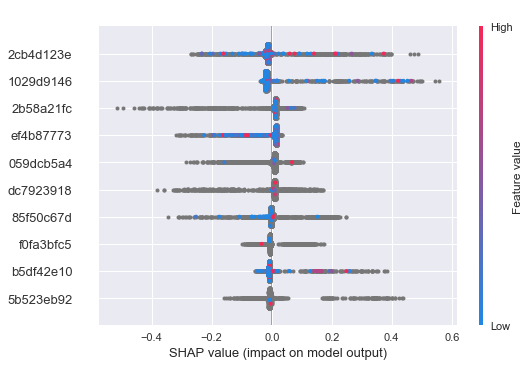

In [20]:
shap.summary_plot(shap_values, train_data, max_display=10, plot_type='dot')

In [21]:
N = 150
sorted_columns = np.argsort(np.sum(np.abs(shap_values), axis=0)[:-1])[::-1]
most_relevant = train_data.columns[sorted_columns[:N]]

In [22]:
union_cols = list(set(most_relevant)|set(cols_leak))
#diff_cols = list(set(most_relevant)-set(cols_leak))

In [23]:
feat_train = train_data[union_cols]
feat_test = test_data[union_cols]

In [24]:
feat_train = feat_train[feat_train.isna().sum().sort_values().index.values]
feat_test = feat_test[feat_train.isna().sum().sort_values().index.values]

In [ ]:
feats.remove('a7f6de992')
feats.remove('ae28689a2')

In [ ]:
feat_train = train_data[union_cols]
feat_test = test_data[union_cols]

In [ ]:
stat_train = stats_prop(feat_train)
stat_test = stats_prop(feat_test)

#### Assembly

In [25]:
train_final = np.hstack((feat_train.values, stat_train.values))
test_final = np.hstack((feat_test.values, stat_test.values))

In [26]:
print('Final number of features: %i' % train_final.shape[1])

Final number of features: 224


### before anything, grid search

#### xgb

params before:
{'learning_rate':0.1, 'colsample_bytree': .04, 'eval_metric':'rmse', 'lambda': 3., 'alpha': 0.03}

params now:
{'learning_rate':0.003, 'colsample_bytree': .75, 'eval_metric':'rmse', 'lambda': 0.0004, 'alpha': 0., 'min_child_weight': 4, 'subsample': 0.15}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
cv_params = {'learning_rate': [0.003]}
ind_params = {'num_boost_round': 6000, 'colsample_bytree': 0.75, 'min_child_weight': 4, 'reg_alpha': 0.,
             'subsample': 0.15, 'reg_lambda': 0.0004}

In [ ]:
optimized_GBM = GridSearchCV(xgb.XGBRegressor(**ind_params), cv_params, scoring = 'neg_mean_squared_error', cv = 5, n_jobs = -1,
                            verbose=1)

In [ ]:
optimized_GBM.fit(train_final, log_target)

In [ ]:
optimized_GBM.best_params_

#### lgb

params before:
{'learning_rate':0.001, 'lambda_l2': 0.05, 'feature_fraction': 0.075, 'lambda_l1': 0.01}

params now:
{'learning_rate':0.002, 'lambda_l2': 0.1, 'feature_fraction': 0.1, 'lambda_l1': 0.002}}

In [ ]:
cv_params = {'learning_rate': [0.002], 'lambda_l2': [0.1], 'feature_fraction': [0.08, 0.1,0.12],
             'lambda_l1': [0.002]}

In [ ]:
def crossvaltest(params,n_splits=5):
    kf = KFold(n_splits=n_splits,shuffle=True) 
    res = []
    for train_index, test_index in kf.split(train_final):
        X_tr, X_tst = train_final[train_index], train_final[test_index]
        y_tr, y_tst = log_target[train_index], log_target[test_index]

        train_set = lgb.Dataset(X_tr, label=y_tr)
        valid_set = lgb.Dataset(X_tst, label=y_tst, reference=train_set)

        bst = lgb.train(params, train_set, num_boost_round=7500, valid_sets=[train_set, valid_set], early_stopping_rounds=500, 
                        verbose_eval=1000)

        y_val = bst.predict(X_tst, num_iteration=bst.best_iteration)

        rmsle = np.sqrt(mean_squared_error(y_tst, y_val))

        res.append(rmsle)
    return np.mean(res)

In [ ]:
from itertools import product

def param_tune(n_splits=5):
    score = ('nothing', 3.)
    for prms in product(cv_params['learning_rate'],
                      cv_params['lambda_l2'],
                      cv_params['feature_fraction'],
                      cv_params['lambda_l1']):
        params = {'metric': 'rmse', 'learning_rate': prms[0], 'lambda_l2': prms[1], 'feature_fraction': prms[2],
                  'lambda_l1': prms[3]}
        res = crossvaltest(params,n_splits)
        # save the crossvalidation result so that future iterations can reuse the best parameters
        print(res)
        if res<score[1]:
            score = (str(params), res)
    return score

In [ ]:
bestpar = param_tune()

In [ ]:
bestpar

#### cb

params before:
{'eta':0.01, 'l2_leaf_reg: 3, 'border_count': 32, 'depth': 5}

params now:
{'learning_rate':0.01, 'l2_leaf_reg': 8, 'border_count': 45, 'depth': 5}}

In [ ]:
cv_params = {'eta': [0.01], 'l2_leaf_reg':[8], 'border_count':[45], 'depth': [5]}

In [ ]:
def crossvaltest(params,n_splits=5):
    kf = KFold(n_splits=n_splits,shuffle=True) 
    res = []
    for train_index, test_index in kf.split(train_final):
        X_tr, X_tst = train_final[train_index], train_final[test_index]
        y_tr, y_tst = log_target[train_index], log_target[test_index]

        bst = cb.CatBoostRegressor(eta=params[0], l2_leaf_reg=params[1], border_count=params[2], iterations=7500,
                                   loss_function='RMSE', eval_metric='RMSE', depth=params[3])
    
        bst.fit(X_tr, y_tr, use_best_model=True, eval_set=(X_tst, y_tst), verbose=False)

        y_val = bst.predict(X_tst)

        rmsle = np.sqrt(mean_squared_error(y_tst, y_val))

        res.append(rmsle)
    return np.mean(res)

In [ ]:
from itertools import product

def param_tune(n_splits=5):
    score = ('nothing', 3.)
    for prms in product(cv_params['eta'],
                      cv_params['l2_leaf_reg'],
                      cv_params['border_count'],
                      cv_params['depth']):
        res = crossvaltest(prms,n_splits)
        # save the crossvalidation result so that future iterations can reuse the best parameters
        print(res)
        if res<score[1]:
            score = (str(prms), res)
    return score

In [ ]:
bestpar = param_tune()

In [ ]:
bestpar

### oof train+test

In [48]:
train_df = pd.DataFrame.from_dict({'ID': train_ID})
test_df = pd.DataFrame.from_dict({'ID': test_ID})

In [49]:
def lgbCV(ooftrain, ooftest, n_folds=3, multiplier=10):
    params = {'boosting': 'gbdt', 'objective':'regression', 'learning_rate':0.002, 'metric':'rmse', 'max_bin':63, 
              'lambda_l2': 0.1, 'device':'cpu', 'feature_fraction': 0.1, 'lambda_l1': 0.002}
    for i in range(multiplier):
        ooftrain['lgb_'+str(i)] = np.zeros(train_ID.shape[0])
        ooftest['lgb_'+str(i)] = np.zeros(test_ID.shape[0])
        kf = KFold(n_splits=n_folds,shuffle=True)
        res = []
        for train_index, test_index in kf.split(train_final):
            X_tr, X_tst = train_final[train_index], train_final[test_index]
            y_tr, y_tst = log_target[train_index], log_target[test_index]

            train_set = lgb.Dataset(X_tr, label=y_tr)
            valid_set = lgb.Dataset(X_tst, label=y_tst, reference=train_set)

            bst = lgb.train(params, train_set, num_boost_round=7500, valid_sets=[train_set, valid_set],
                            early_stopping_rounds=500, verbose_eval=False)

            y_val = bst.predict(X_tst, num_iteration=bst.best_iteration)

            rmsle = np.sqrt(mean_squared_error(y_tst, y_val))
            
            res.append(rmsle)
            
            ooftrain['lgb_'+str(i)][test_index] = np.expm1(y_val)
    
            ooftest['lgb_'+str(i)] = ooftest['lgb_'+str(i)] + np.expm1(bst.predict(test_final, 
                                                                                   num_iteration=bst.best_iteration))/n_folds

        print(np.mean(res))
    return

In [33]:
def xgbCV(ooftrain, ooftest, n_folds=4, multiplier=10):
    params = {'booster': 'gbtree', 'learning_rate':0.003, 'colsample_bytree': .75, 'eval_metric':'rmse', 'lambda': 0.0004,
              'alpha': 0., 'min_child_weight': 4, 'subsample': 0.15}
    test_set = xgb.DMatrix(test_final)
    for i in range(multiplier):
        ooftrain['xgb_'+str(i)] = np.zeros(train_ID.shape[0])
        ooftest['xgb_'+str(i)] = np.zeros(test_ID.shape[0])
        kf = KFold(n_splits=n_folds,shuffle=True)
        res = []
        for train_index, test_index in kf.split(train_final):
            X_tr, X_tst = train_final[train_index], train_final[test_index]
            y_tr, y_tst = log_target[train_index], log_target[test_index]

            train_set = xgb.DMatrix(X_tr, label=y_tr)
            valid_set = xgb.DMatrix(X_tst, label=y_tst)

            bst = xgb.train(params, train_set, num_boost_round=20000, evals=[(train_set, 'train'), (valid_set, 'val')],
                            early_stopping_rounds=500, verbose_eval=False)

            y_val = bst.predict(valid_set, ntree_limit=bst.best_ntree_limit)

            rmsle = np.sqrt(mean_squared_error(y_tst, y_val))
            
            res.append(rmsle)
            
            ooftrain['xgb_'+str(i)][test_index] = np.expm1(y_val)
    
            ooftest['xgb_'+str(i)] = ooftest['xgb_'+str(i)] + np.expm1(bst.predict(test_set,
                                                                                     ntree_limit=bst.best_ntree_limit))/n_folds

        print(np.mean(res))
    return

In [34]:
def cbCV(ooftrain, ooftest, n_folds=4, multiplier=10):
    for i in range(multiplier):
        ooftrain['cb_'+str(i)] = np.zeros(train_ID.shape[0])
        ooftest['cb_'+str(i)] = np.zeros(test_ID.shape[0])
        kf = KFold(n_splits=n_folds,shuffle=True)
        res = []
        for train_index, test_index in kf.split(train_final):
            X_tr, X_tst = train_final[train_index], train_final[test_index]
            y_tr, y_tst = log_target[train_index], log_target[test_index]

            bst = cb.CatBoostRegressor(eta=0.01, l2_leaf_reg=8, border_count=45, iterations=7500,
                                       loss_function='RMSE', eval_metric='RMSE', depth=5)
    
            bst.fit(X_tr, y_tr, use_best_model=True, eval_set=(X_tst, y_tst), verbose=False)

            y_val = bst.predict(X_tst)

            rmsle = np.sqrt(mean_squared_error(y_tst, y_val))
            
            res.append(rmsle)
            
            ooftrain['cb_'+str(i)][test_index] = np.expm1(y_val)
    
            ooftest['cb_'+str(i)] = ooftest['cb_'+str(i)] + np.expm1(bst.predict(test_final))/n_folds

        print(np.mean(res))
    return

In [50]:
lgbCV(train_df,test_df)

1.3372013831753466
1.3383272501205574
1.3381981892760502
1.3402252120242713
1.336830550388522
1.3345682910645797
1.337177872058633
1.338305606198137
1.338289981136769
1.33630578694953


In [36]:
xgbCV(train_df,test_df)

1.347159489137812
1.3392652465205457
1.3463368624220686
1.341198904869394
1.3404861657267664
1.3408243163019287
1.336138103479716
1.342014864173713
1.3385180959912715
1.3416710979763433


In [ ]:
cbCV(train_df,test_df)

In [37]:
train_df.head()

,ID,lgb_0,lgb_1,lgb_2,lgb_3,lgb_4,lgb_5,lgb_6,lgb_7,lgb_8,...,xgb_0,xgb_1,xgb_2,xgb_3,xgb_4,xgb_5,xgb_6,xgb_7,xgb_8,xgb_9
0,000d6aaf2,2565.983436,2086.443558,2260.534071,2701.728041,2069.787706,2261.766193,1973.316905,2471.285865,2407.232077,...,2627.829102,2392.968750,2945.404297,2270.577881,3017.836182,2678.730957,2188.171631,2449.648926,2809.797852,2612.948242
1,000fbd867,2921.002129,3093.502325,3527.628101,3248.547739,3445.516149,2918.703973,2778.843722,2886.965687,3599.330579,...,3096.312256,3603.129395,3107.948486,3022.036621,3217.696289,2850.651855,3544.313232,3209.409912,3028.671875,3537.489990
2,0027d6b71,2798.523489,2511.300145,2504.945872,2202.690138,2670.775177,2601.656087,2615.446777,2655.241777,2571.651617,...,2393.968994,2317.320068,2409.109375,2621.826660,2430.071289,2143.507568,2633.504883,2418.440674,2413.145508,2190.652100
3,0028cbf45,682.562484,810.585950,799.497231,750.521792,883.039854,726.673191,866.608056,796.145762,1044.218287,...,806.731812,1164.073853,1011.080688,1109.988281,845.801270,948.634949,831.039795,1009.720154,1067.922363,842.580750
4,002a68644,3142.640857,3757.304215,3131.859651,2781.894977,3566.504390,3749.006871,3716.042291,3941.930195,3235.503512,...,3036.584473,3366.578369,3159.438232,2838.515869,3179.260010,2630.410156,3414.225342,3413.212402,3161.795898,3132.460938


In [38]:
test_df.head()

,ID,lgb_0,lgb_1,lgb_2,lgb_3,lgb_4,lgb_5,lgb_6,lgb_7,lgb_8,...,xgb_0,xgb_1,xgb_2,xgb_3,xgb_4,xgb_5,xgb_6,xgb_7,xgb_8,xgb_9
0,000137c73,2208.472205,2145.254689,2044.938018,2175.858984,2176.588397,2115.722348,2052.703093,2060.573657,2117.585963,...,2611.120178,2636.073608,2449.379456,2581.673767,2405.734680,2782.324219,2757.645447,2912.211975,2732.431244,2689.832275
1,00021489f,1739.514761,1848.670285,1841.256499,1699.112199,1763.266443,1738.139625,1744.471739,1853.519936,1891.919021,...,1944.980743,1898.766663,1906.157501,2001.843994,1936.309601,1951.709198,2199.655151,2273.914520,2078.324005,2043.855438
2,0004d7953,1964.183165,1975.447112,2028.329491,2038.659446,2012.352609,1976.024373,2015.253768,2023.193226,2024.028484,...,2323.575500,2385.110046,2360.122253,2276.601196,2398.879639,2378.556152,2186.331970,2429.158539,2254.248047,2351.267395
3,00056a333,5480.846754,5328.587406,5226.245698,5339.886898,5440.191024,5333.590951,5503.242323,5490.707796,5597.542496,...,4833.179688,5087.514526,4673.544983,4614.738159,4858.242004,4480.678223,4381.140625,4777.290649,4843.488647,4880.068176
4,00056d8eb,2254.158540,2181.381761,2186.360207,2252.343034,2159.100507,2292.238724,2282.147165,2287.989536,2233.866354,...,2448.493561,2446.369202,2657.072449,2438.778137,2490.410522,2422.372833,2605.997681,2544.232666,2579.081238,2627.478516


In [ ]:
train_df.to_csv('../submission_files/leak/oof/train_df_440f_10x5fold.csv', index=False)
test_df.to_csv('../submission_files/leak/oof/test_df_440f_10x5fold.csv', index=False)
#train_df = pd.read_csv('../submission_files/leak/oof/train_df_sumf_pc_10x5fold.csv')
#test_df = pd.read_csv('../submission_files/leak/oof/test_df_sumf_pc_10x5fold.csv')

In [51]:
train_df = train_df.drop(['ID'], axis=1)
test_df = test_df.drop(['ID'], axis=1)

In [52]:
#train_df = train_df[train_df.columns[:10]]
#test_df = test_df[test_df.columns[:10]]

In [53]:
#train_df2 = np.hstack((train_df.values, stat_train.values))#, stat_train2.values))
#test_df2 = np.hstack((test_df.values, stat_test.values))#, stat_test2.values))
train_df2 = train_df.values
test_df2 = test_df.values

In [54]:
train_df2.shape

(4459, 10)

### Final CV

#### cb

In [55]:
def finalCV(n_folds=3, multiplier=10):
    submission = pd.DataFrame.from_dict({'ID': test_ID, 'target': np.zeros(test_ID.shape[0])})
    for i in range(multiplier):
        preds = np.zeros(test_ID.shape[0])
        kf = KFold(n_splits=n_folds,shuffle=True)
        res = []
        for train_index, test_index in kf.split(train_df2):
            X_tr, X_tst = train_df2[train_index], train_df2[test_index]
            y_tr, y_tst = log_target[train_index], log_target[test_index]

            bst = cb.CatBoostRegressor(eta=0.01, iterations=2500,
                                       loss_function='RMSE', eval_metric='RMSE', depth=4)
    
            bst.fit(X_tr, y_tr, use_best_model=True, eval_set=(X_tst, y_tst), verbose=False)

            y_val = bst.predict(X_tst)

            rmsle = np.sqrt(mean_squared_error(y_tst, y_val))
            
            res.append(rmsle)
            
            preds = preds + np.expm1(bst.predict(test_df2))/n_folds

        print(np.mean(res))
        
        submission.target = submission.target + preds/multiplier
    return submission

In [45]:
def lgbfinalCV(n_folds=5, multiplier=10):
    params = {'boosting': 'gbdt', 'objective':'regression', 'learning_rate':0.01, 'metric':'rmse', 'max_bin':63, 
              'lambda_l2': 0.1, 'device':'cpu', 'feature_fraction': 0.1, 'lambda_l1': 0.002}
    submission = pd.DataFrame.from_dict({'ID': test_ID, 'target': np.zeros(test_ID.shape[0])})
    for i in range(multiplier):
        preds = np.zeros(test_ID.shape[0])
        kf = KFold(n_splits=n_folds,shuffle=True)
        res = []
        for train_index, test_index in kf.split(train_df2):
            X_tr, X_tst = train_df2[train_index], train_df2[test_index]
            y_tr, y_tst = log_target[train_index], log_target[test_index]

            train_set = lgb.Dataset(X_tr, label=y_tr)
            valid_set = lgb.Dataset(X_tst, label=y_tst, reference=train_set)

            bst = lgb.train(params, train_set, num_boost_round=7500, valid_sets=[train_set, valid_set],
                            early_stopping_rounds=500, verbose_eval=False)

            y_val = bst.predict(X_tst, num_iteration=bst.best_iteration)

            rmsle = np.sqrt(mean_squared_error(y_tst, y_val))
            
            res.append(rmsle)
            
            preds = preds + np.expm1(bst.predict(test_df2, num_iteration=bst.best_iteration))/n_folds

        print(np.mean(res))
        
        submission.target = submission.target + preds/multiplier
    return submission

In [46]:
def xgbfinalCV(n_folds=5, multiplier=10):
    params = {'booster': 'gbtree', 'learning_rate':0.003, 'colsample_bytree': .75, 'eval_metric':'rmse', 'lambda': 0.0004,
              'alpha': 0., 'min_child_weight': 4, 'subsample': 0.15}
    test_set = xgb.DMatrix(test_df2)
    submission = pd.DataFrame.from_dict({'ID': test_ID, 'target': np.zeros(test_ID.shape[0])})
    for i in range(multiplier):
        preds = np.zeros(test_ID.shape[0])
        kf = KFold(n_splits=n_folds,shuffle=True)
        res = []
        for train_index, test_index in kf.split(train_df2):
            X_tr, X_tst = train_df2[train_index], train_df2[test_index]
            y_tr, y_tst = log_target[train_index], log_target[test_index]

            train_set = xgb.DMatrix(X_tr, label=y_tr)
            valid_set = xgb.DMatrix(X_tst, label=y_tst)

            bst = xgb.train(params, train_set, num_boost_round=20000, evals=[(train_set, 'train'), (valid_set, 'val')],
                            early_stopping_rounds=500, verbose_eval=False)

            y_val = bst.predict(valid_set, ntree_limit=bst.best_ntree_limit)

            rmsle = np.sqrt(mean_squared_error(y_tst, y_val))
            
            res.append(rmsle)
            
            preds = preds + np.expm1(bst.predict(test_set, ntree_limit=bst.best_ntree_limit))/n_folds

        print(np.mean(res))
        
        submission.target = submission.target + preds/multiplier
    return submission

In [56]:
submission_cb = finalCV()

1.3317271491975846
1.3329319590679356
1.331395845216788
1.3308817513588014
1.332752399903949
1.3318826677515518
1.331633855844547
1.331777130353187
1.332282609843406
1.3301588082748326


In [ ]:
submission_lgb = lgbfinalCV()

In [ ]:
submission_xgb = xgbfinalCV()

#### ceiling to overestimate

In [ ]:
for submission in [submission_cb,submission_lgb,submission_xgb]:
    submission.target = 1000*np.ceil(submission.target)
#submission.target = 1000*submission.target

In [ ]:
submission_cb.head(11)

In [ ]:
submission_lgb.head(11)

In [ ]:
submission_xgb.head(11)

In [ ]:
submission_cb.to_csv('../submission_files/leak/58. stackcb_440f.csv', index=False)
submission_lgb.to_csv('../submission_files/leak/56. stacklgb_440f.csv', index=False)
submission_xgb.to_csv('../submission_files/leak/57. stackxgb_440f.csv', index=False)

In [ ]:
submission = pd.read_csv("../submission_files/leak/24. stackcb_sumf_pc_138.csv")

In [ ]:
leak2 = pd.read_csv('../submission_files/leak/public/extraf6.csv')

leak2_idx = leak2[leak2.target != 0.].index.values
leak2_vals = leak2[leak2.target != 0.].target.values

leak2_vals = np.round(np.expm1(leak2_vals))

In [ ]:
sub = submission.copy()

In [ ]:
sub.target = 0.5*submission.target + 0.5*submission_cb.target

In [ ]:
sub.target[leak2_idx] = 0.5*sub.target[leak2_idx] + 0.5*leak2_vals

In [ ]:
sub.head(11)

In [ ]:
sub.to_csv("../submission_files/leak/59. 05x24+05x58.csv", index=False)

In [ ]:
sub = pd.read_csv('../submission_files/leak/public/04. honest_v5_137.csv')

In [ ]:
sub2 = pd.read_csv('../submission_files/leak/59. 05x24+05x58_138.csv')

In [ ]:
sub3 = sub.copy()

In [ ]:
sub3.target = 0.7*sub.target + 0.3*sub2.target

In [ ]:
sub3.to_csv("../submission_files/leak/60. 03x59+07xpublic04.csv", index=False)

In [ ]:
ss = pd.read_csv('../submission_files/leak/28. 24+public03_059_best.csv')

In [ ]:
sub['h'] = sub.target - ss.target

In [ ]:
sub.h[sub.h!=0].index.values.shape